#Data Visualization

In [ ]:
from google.colab import drive    #We first import the dataset from the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

SAVE=True
DOWNLOAD=True

ARCHITECTURE_1

['loss', 'huber_loss', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error', 'log_cosh']
PATIENT_0



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

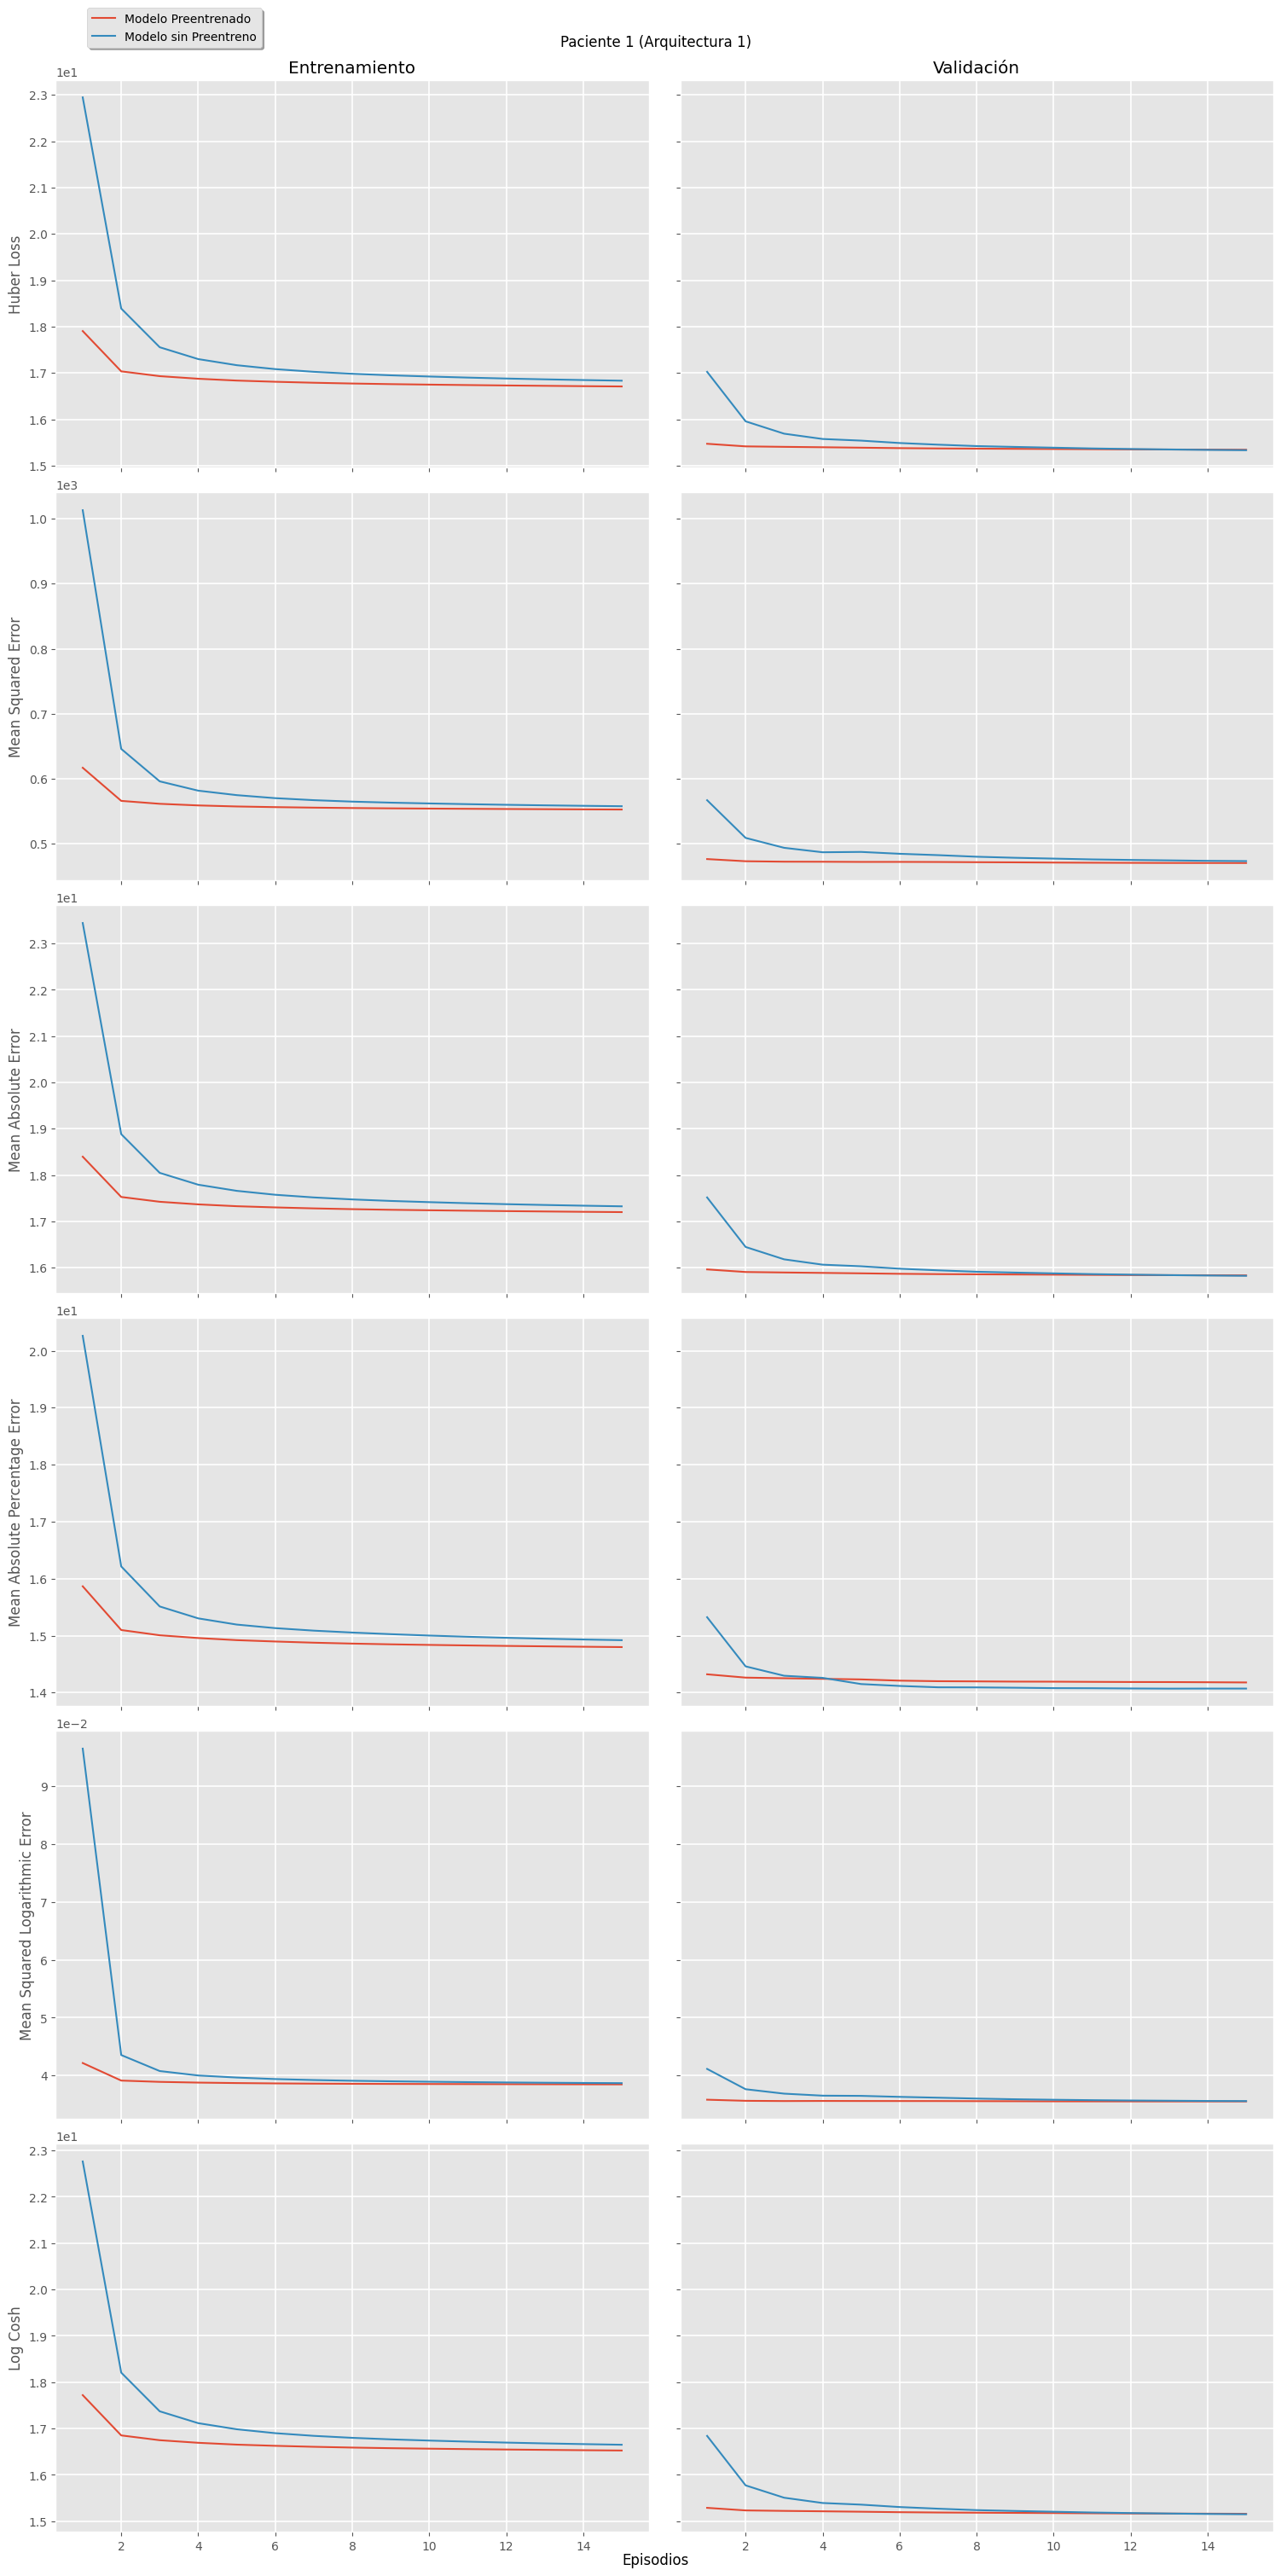

PATIENT_1



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

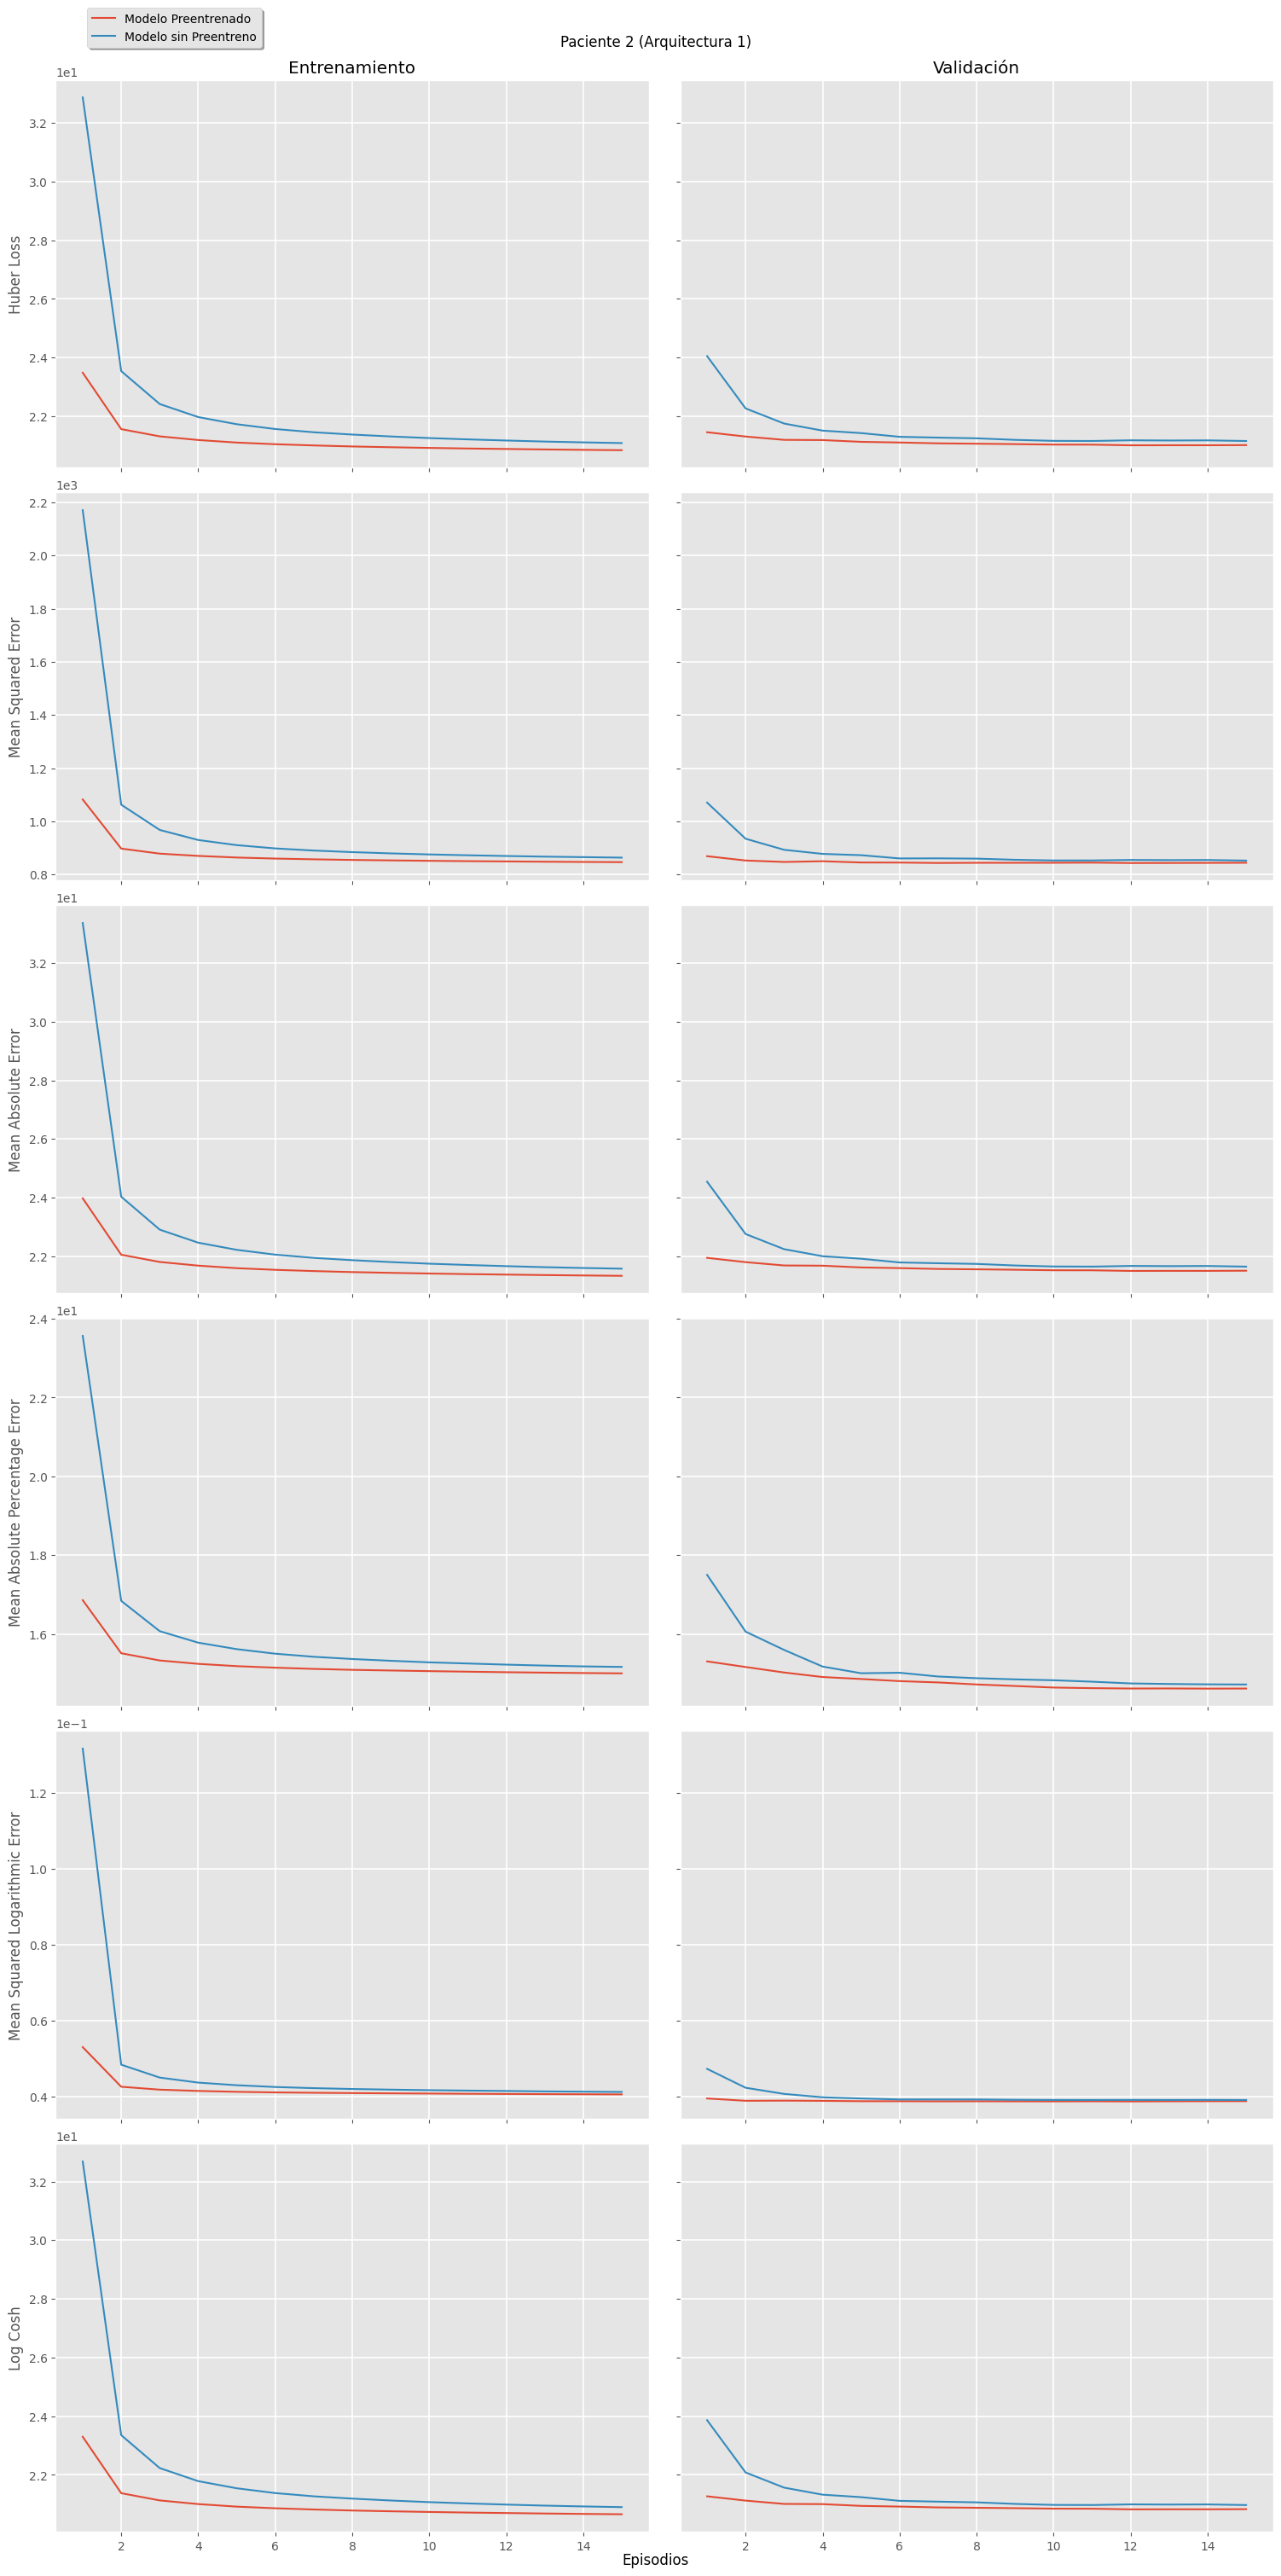

PATIENT_2



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

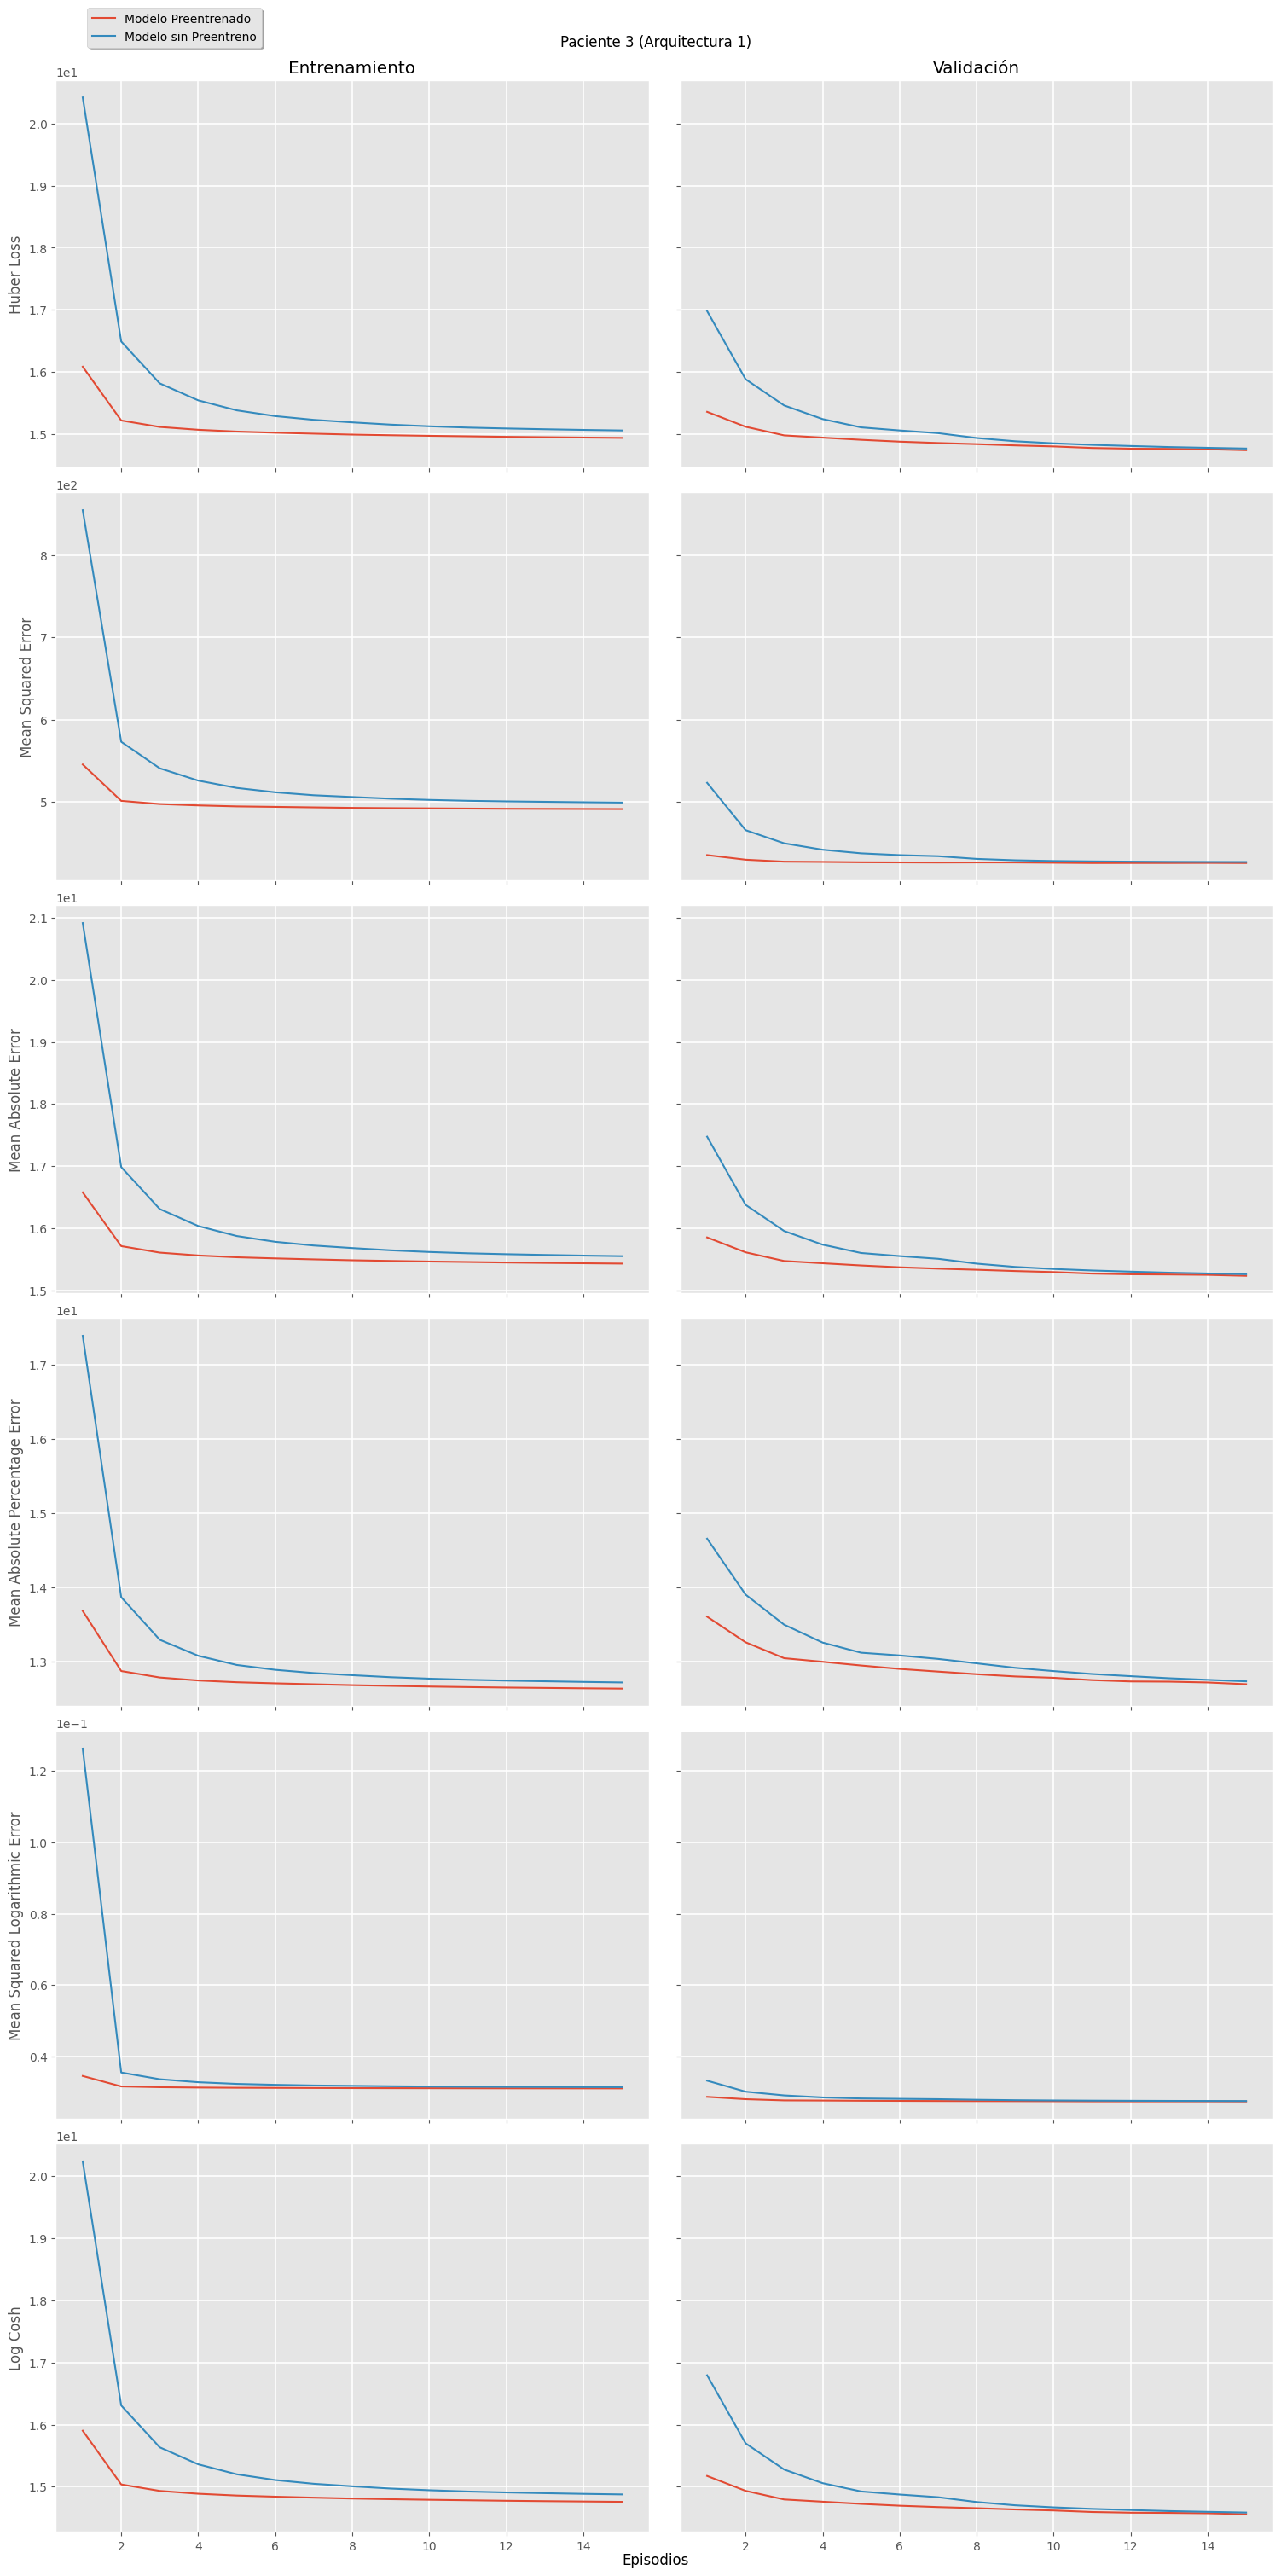

PATIENT_3



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

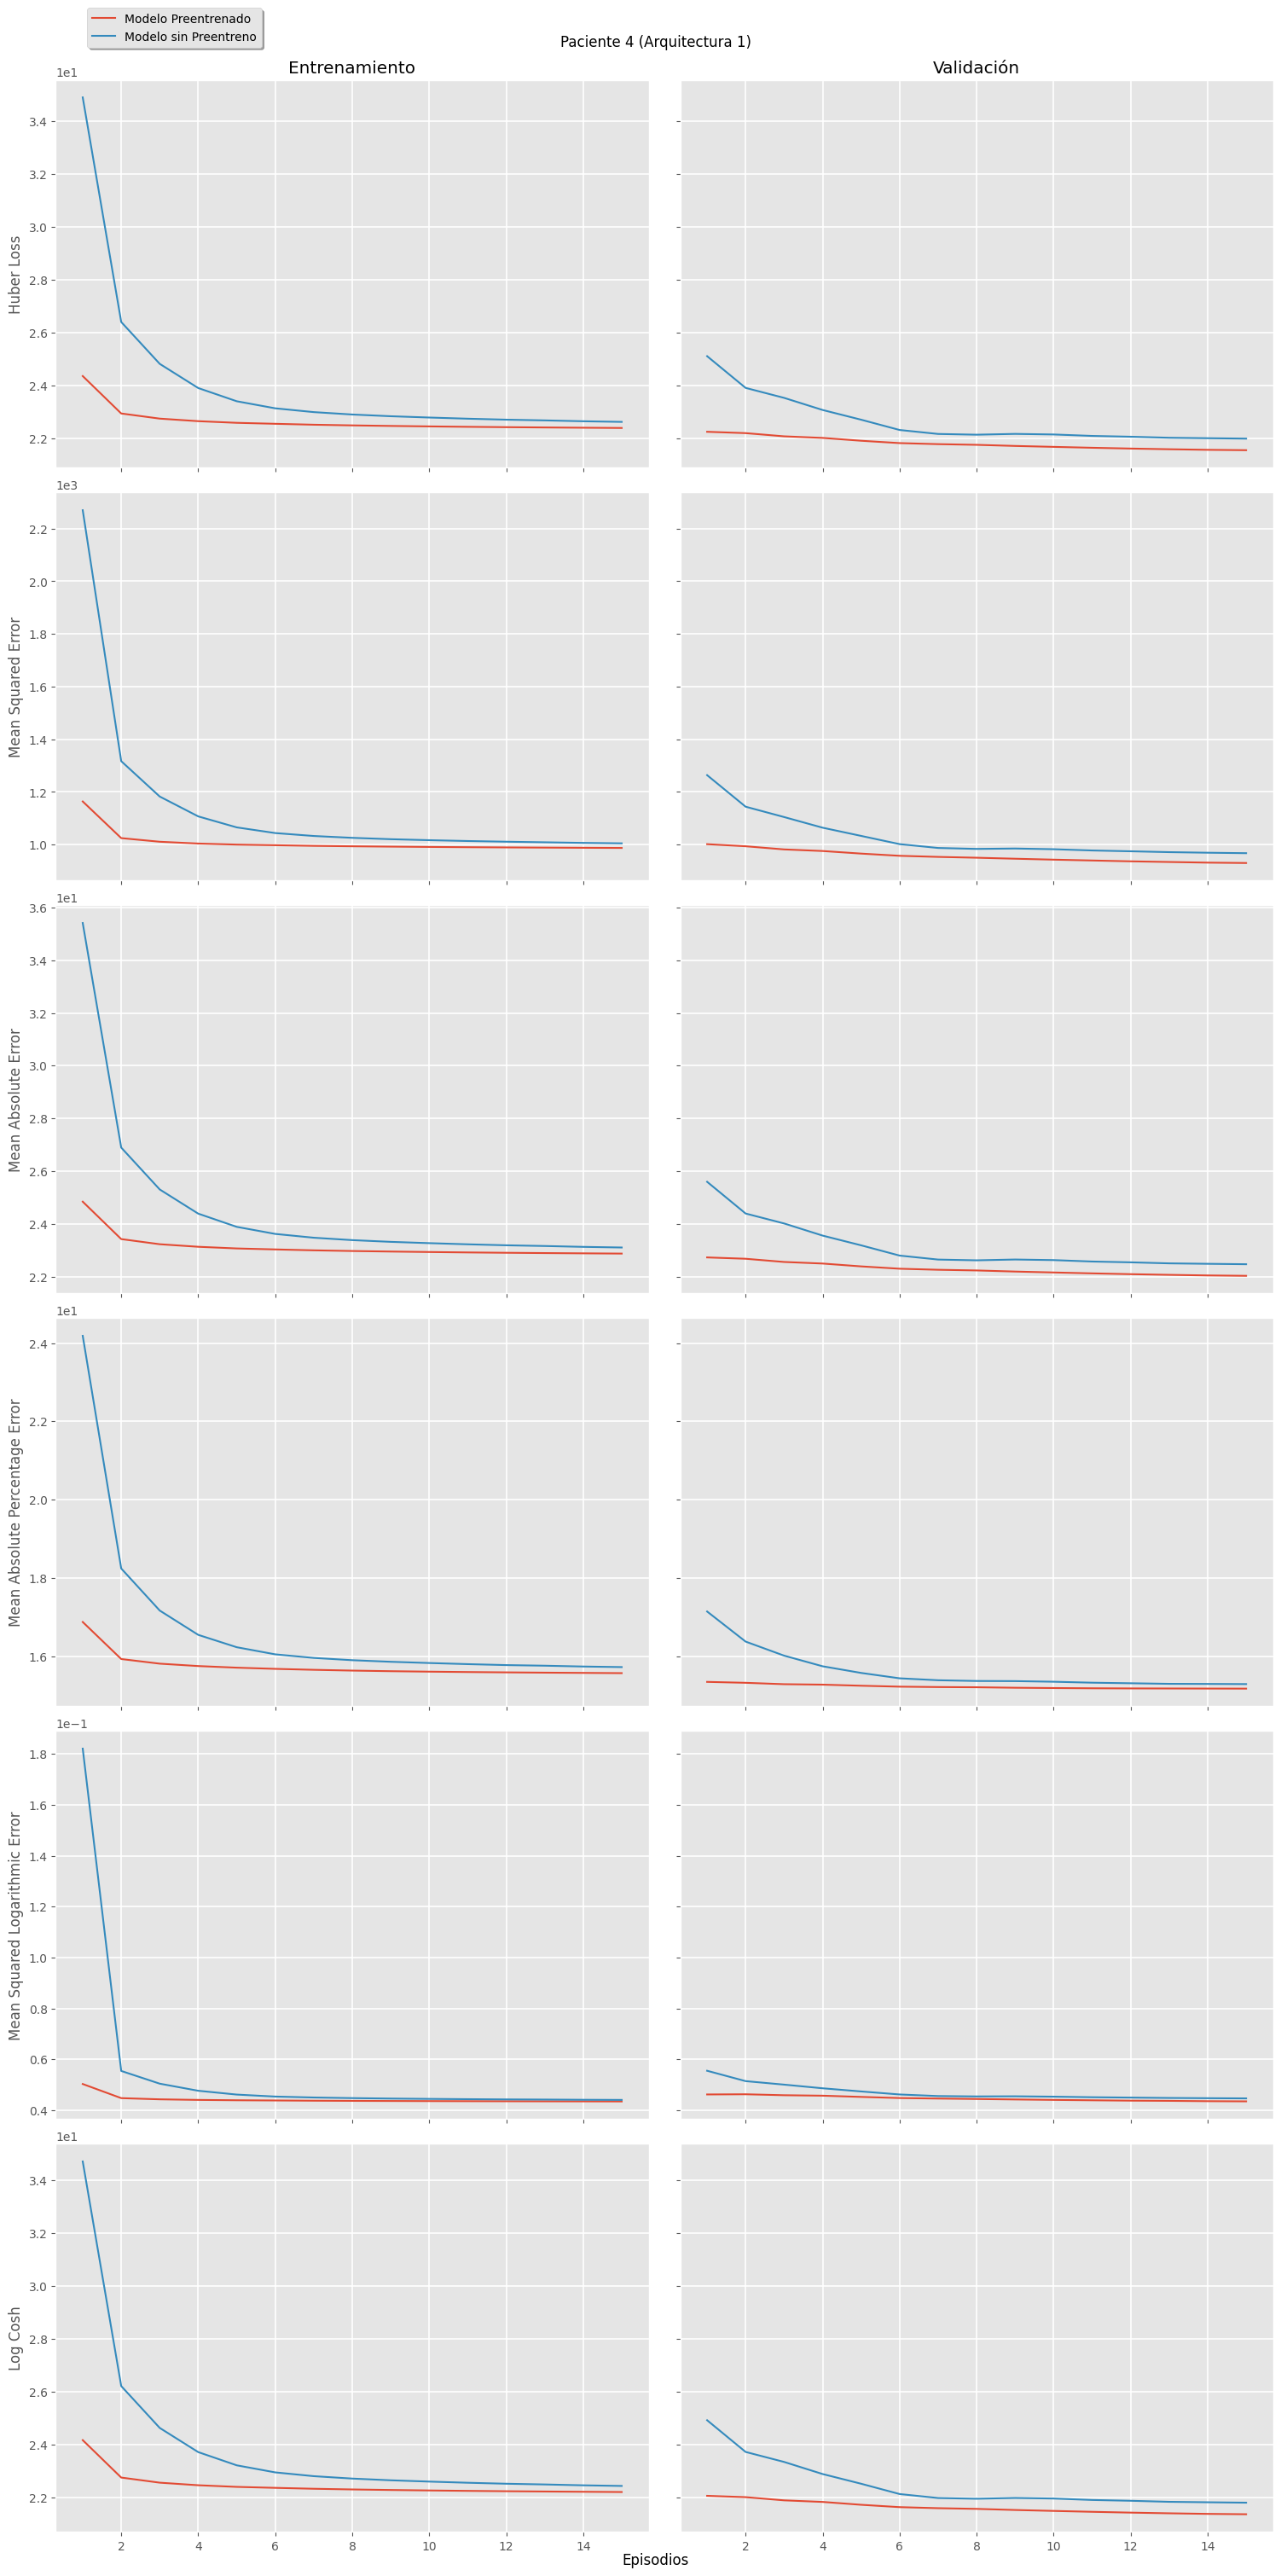

PATIENT_4



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

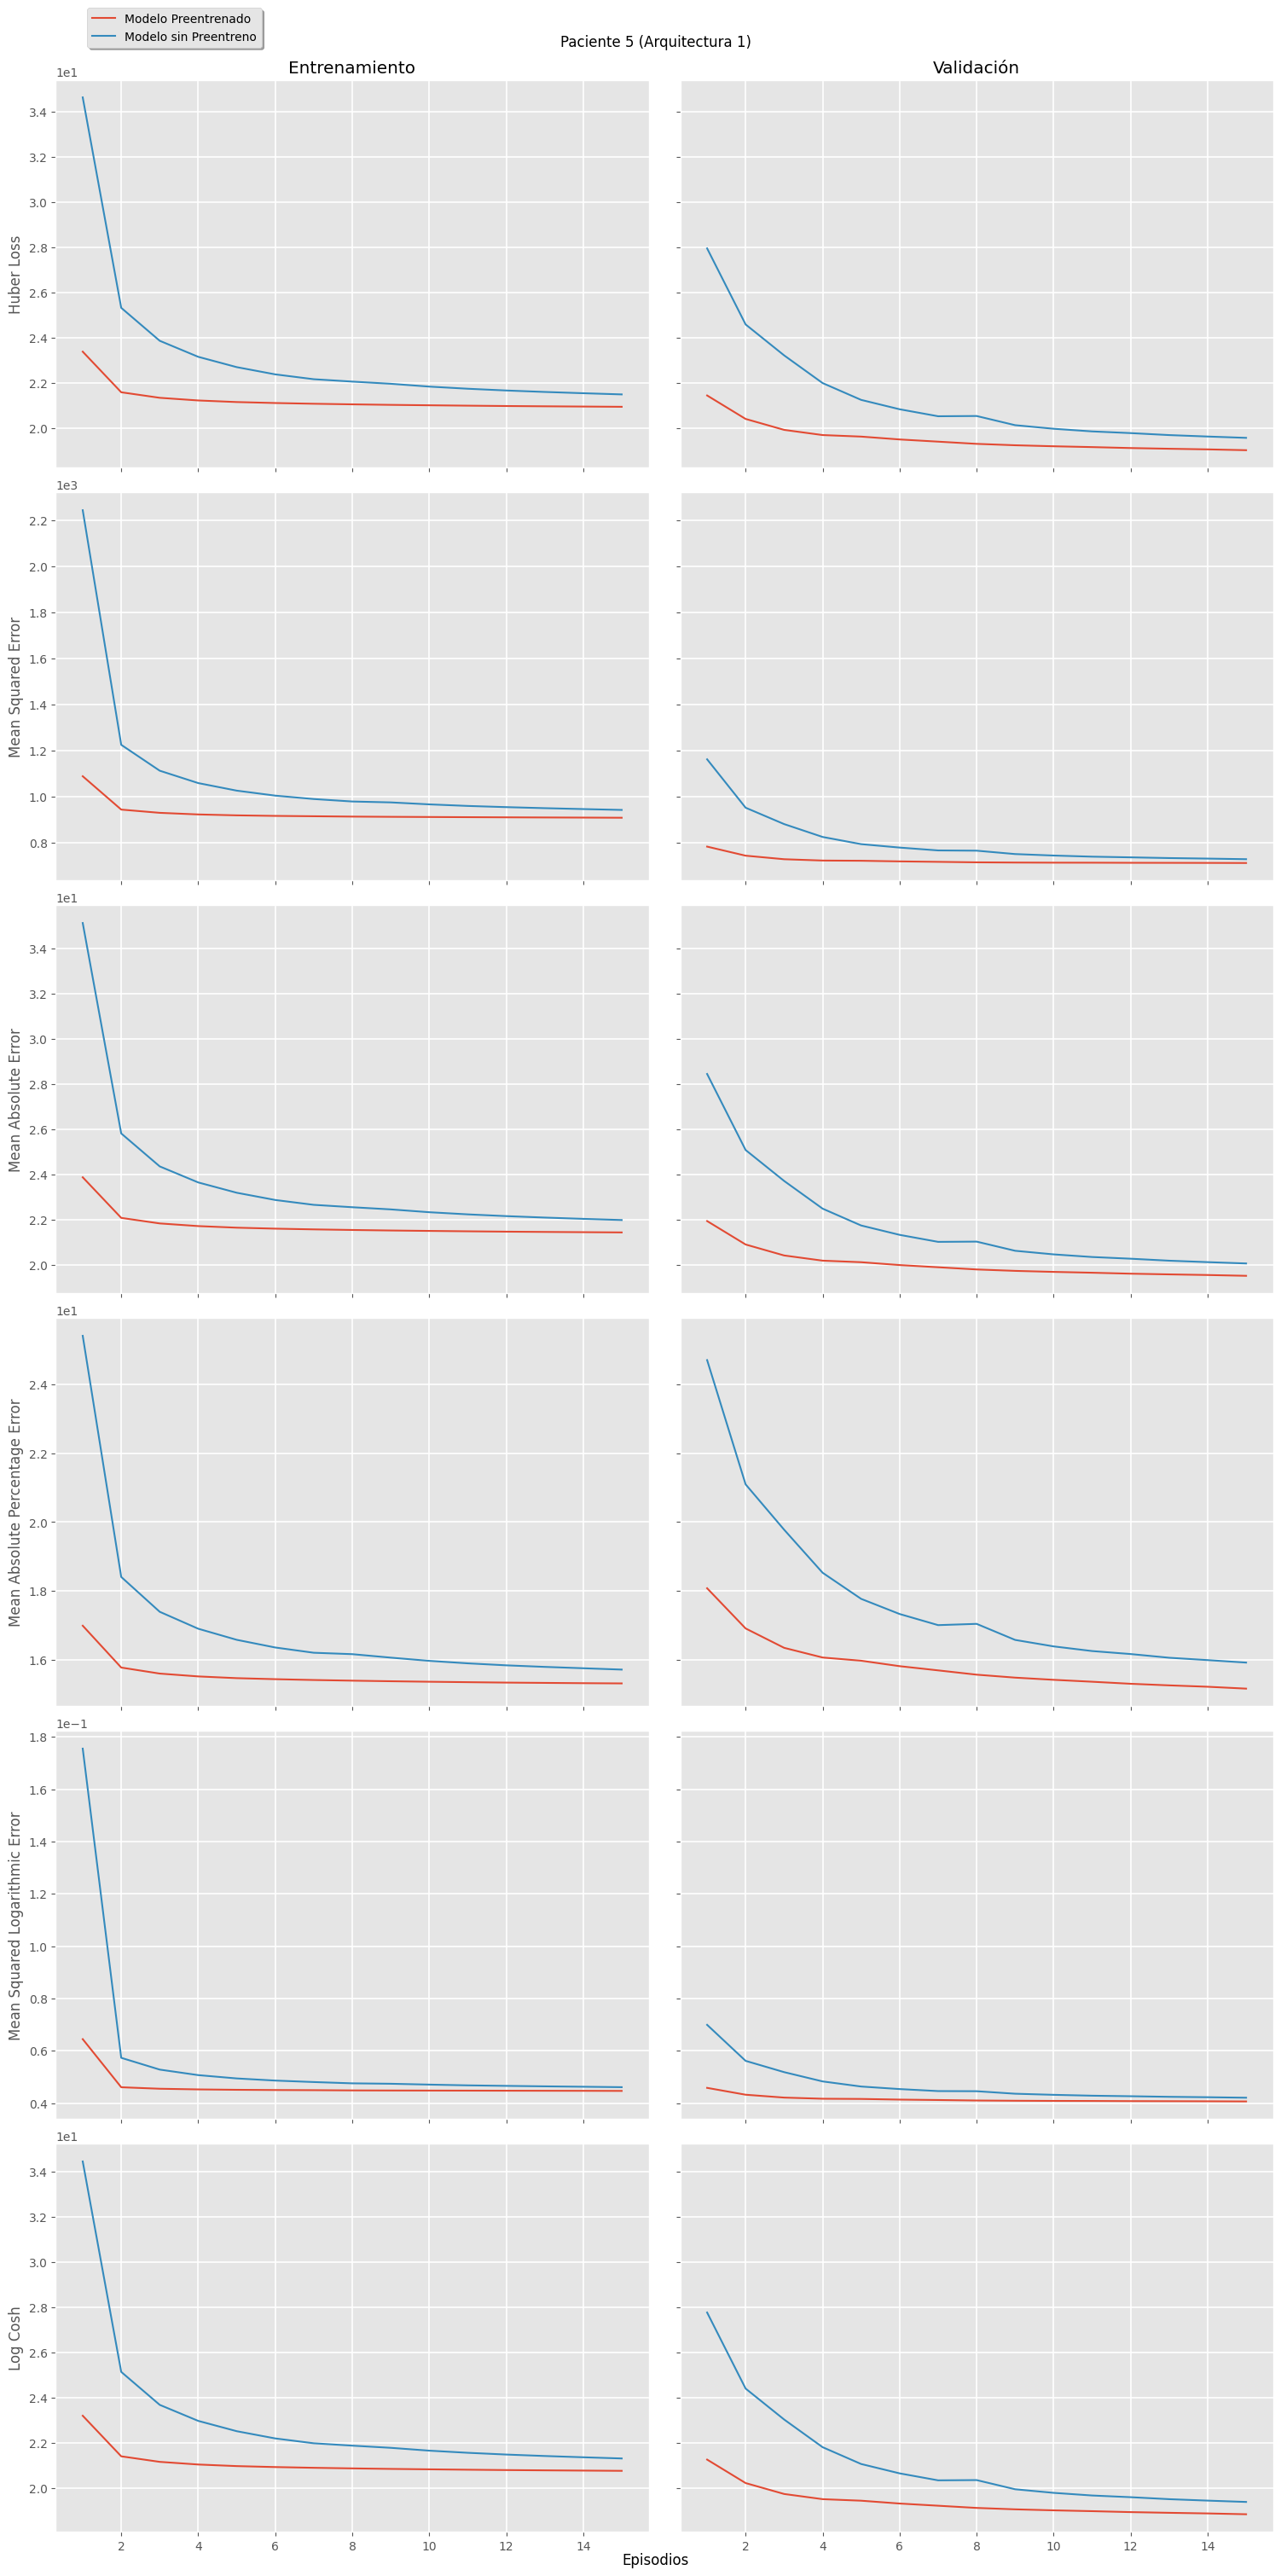

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ARCHITECTURE_2

['loss', 'huber_loss', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error', 'log_cosh']
PATIENT_0



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

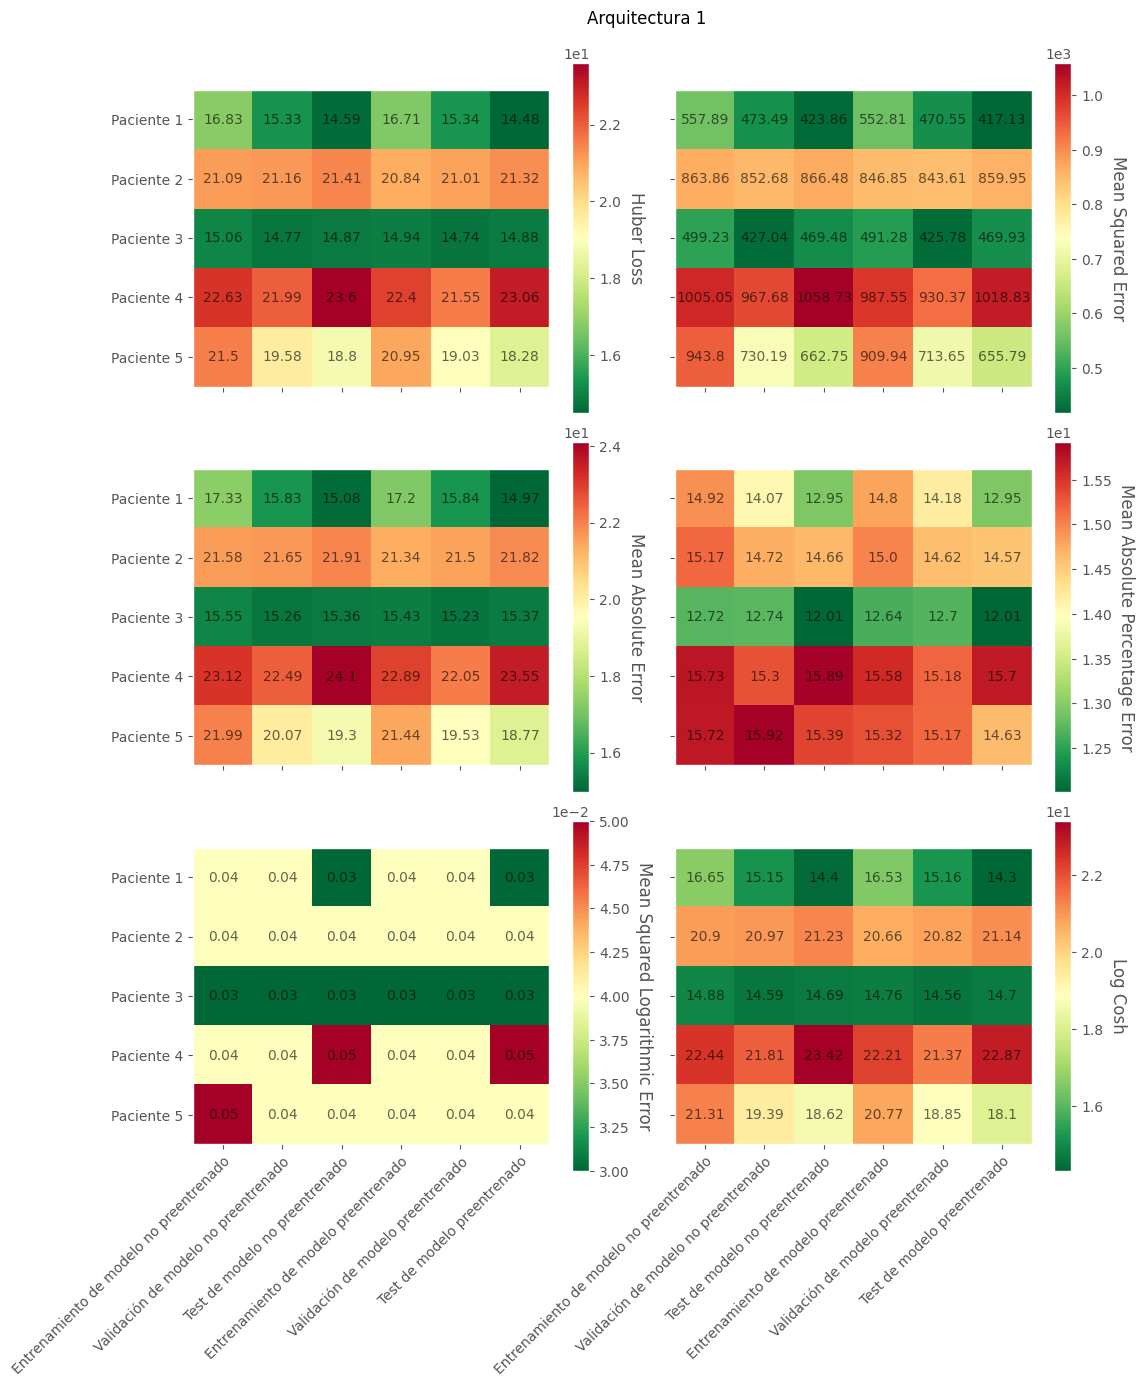

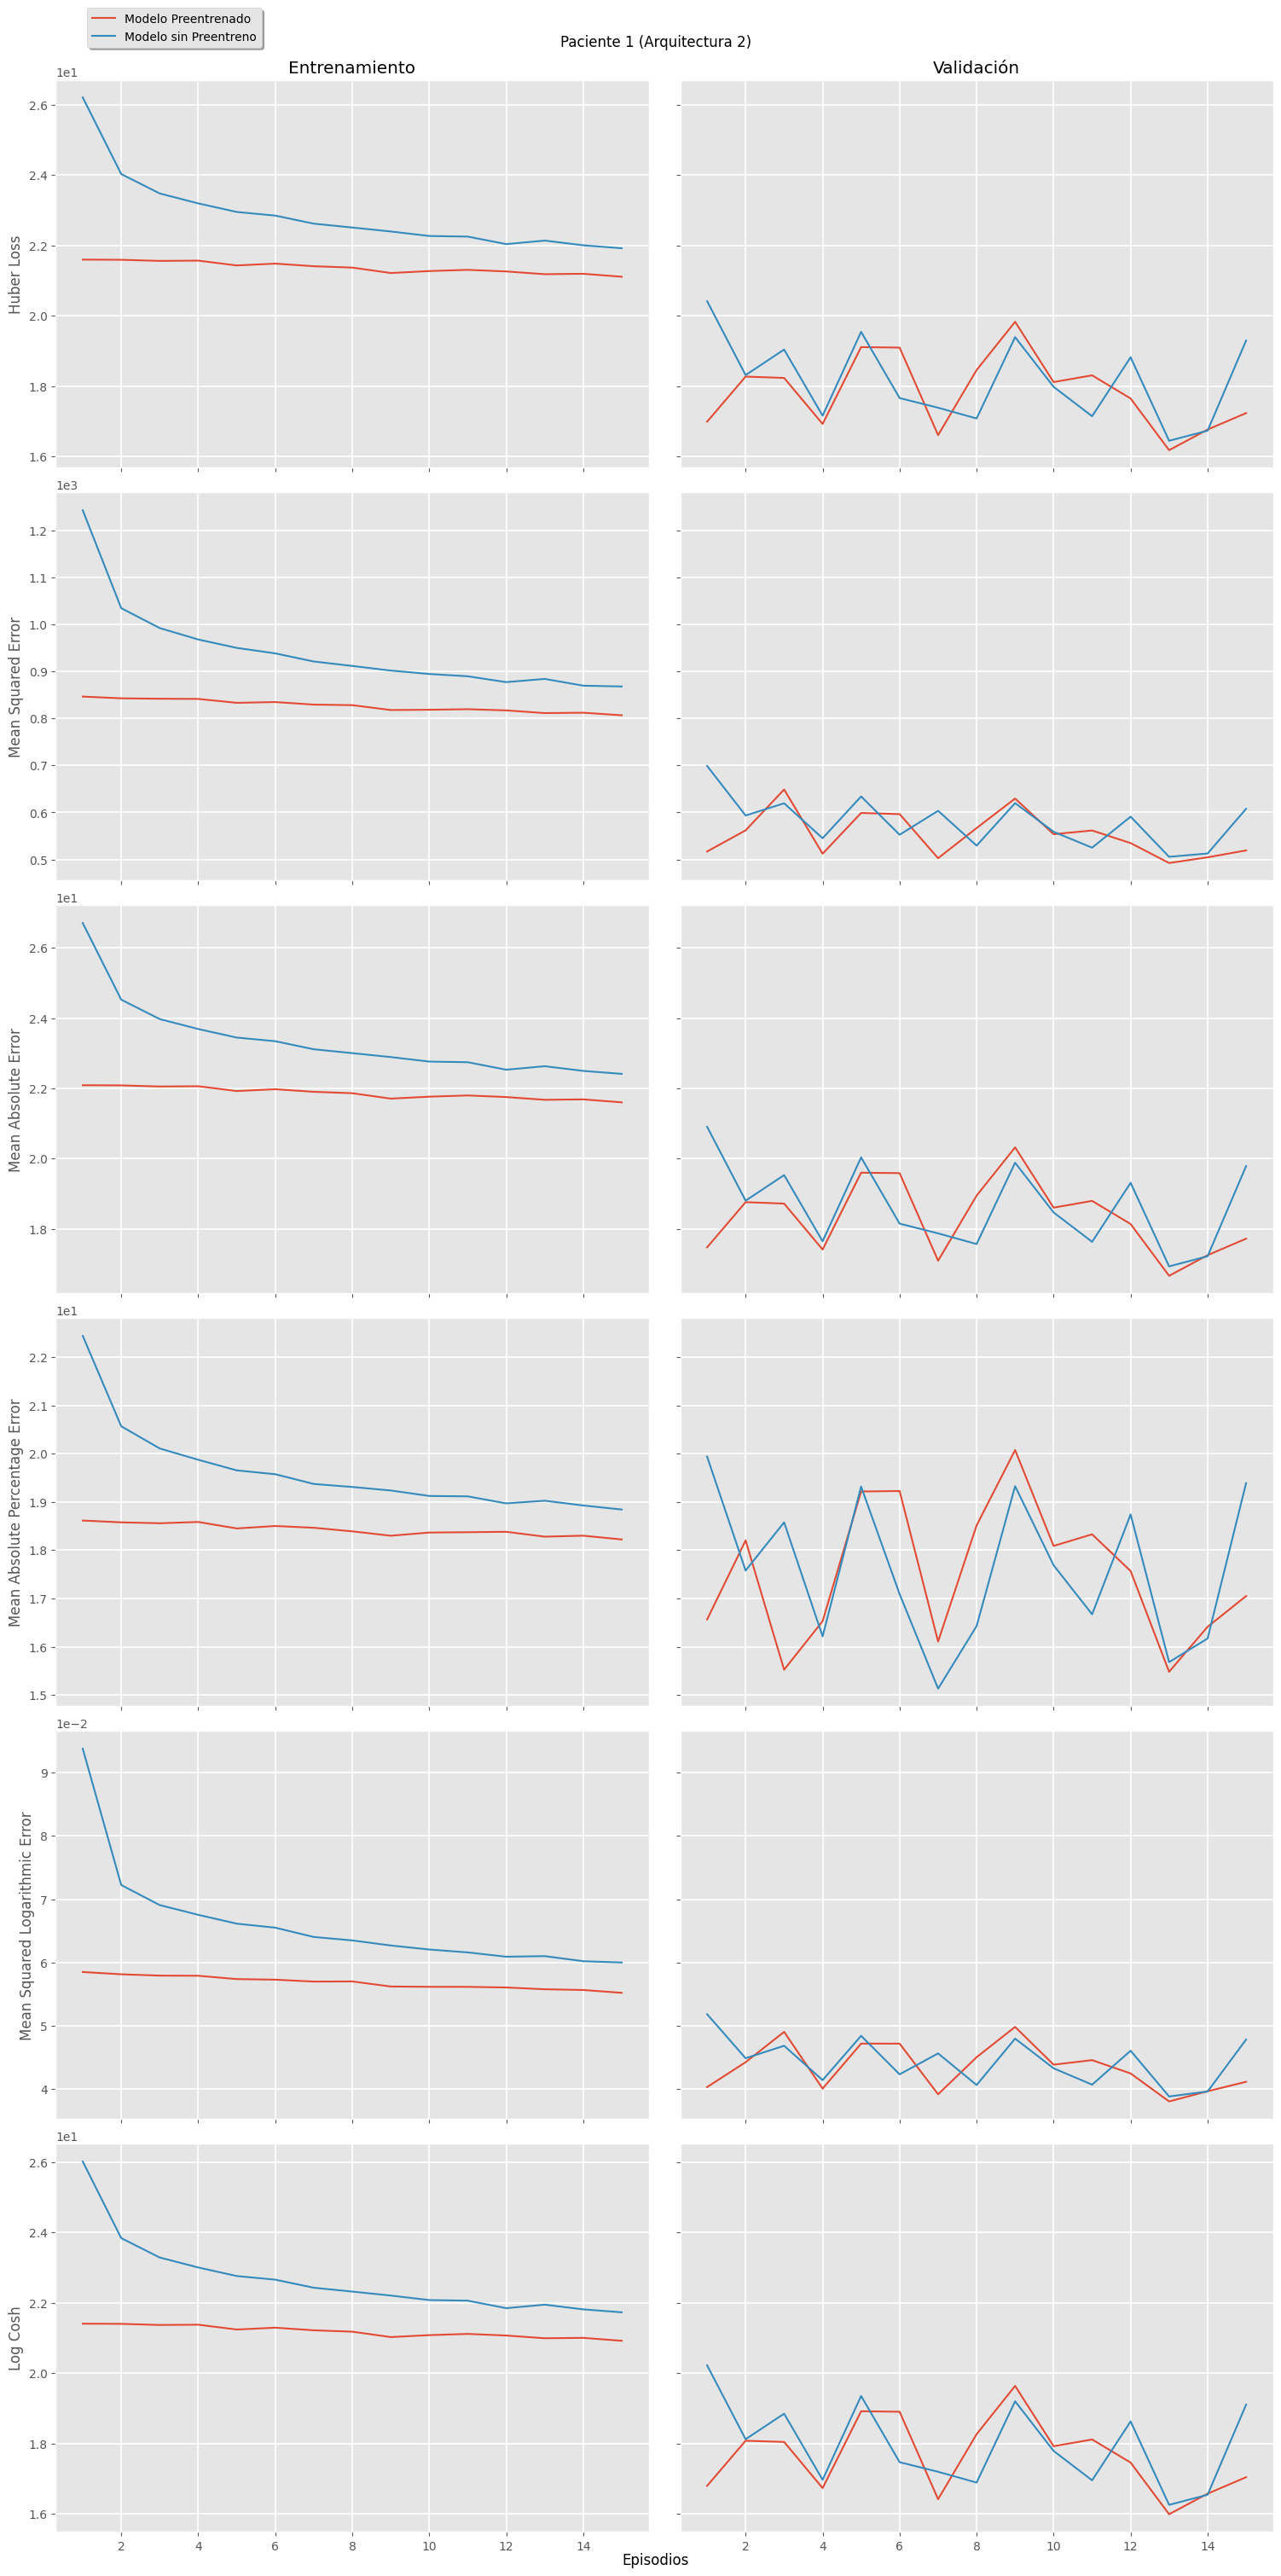

PATIENT_1



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

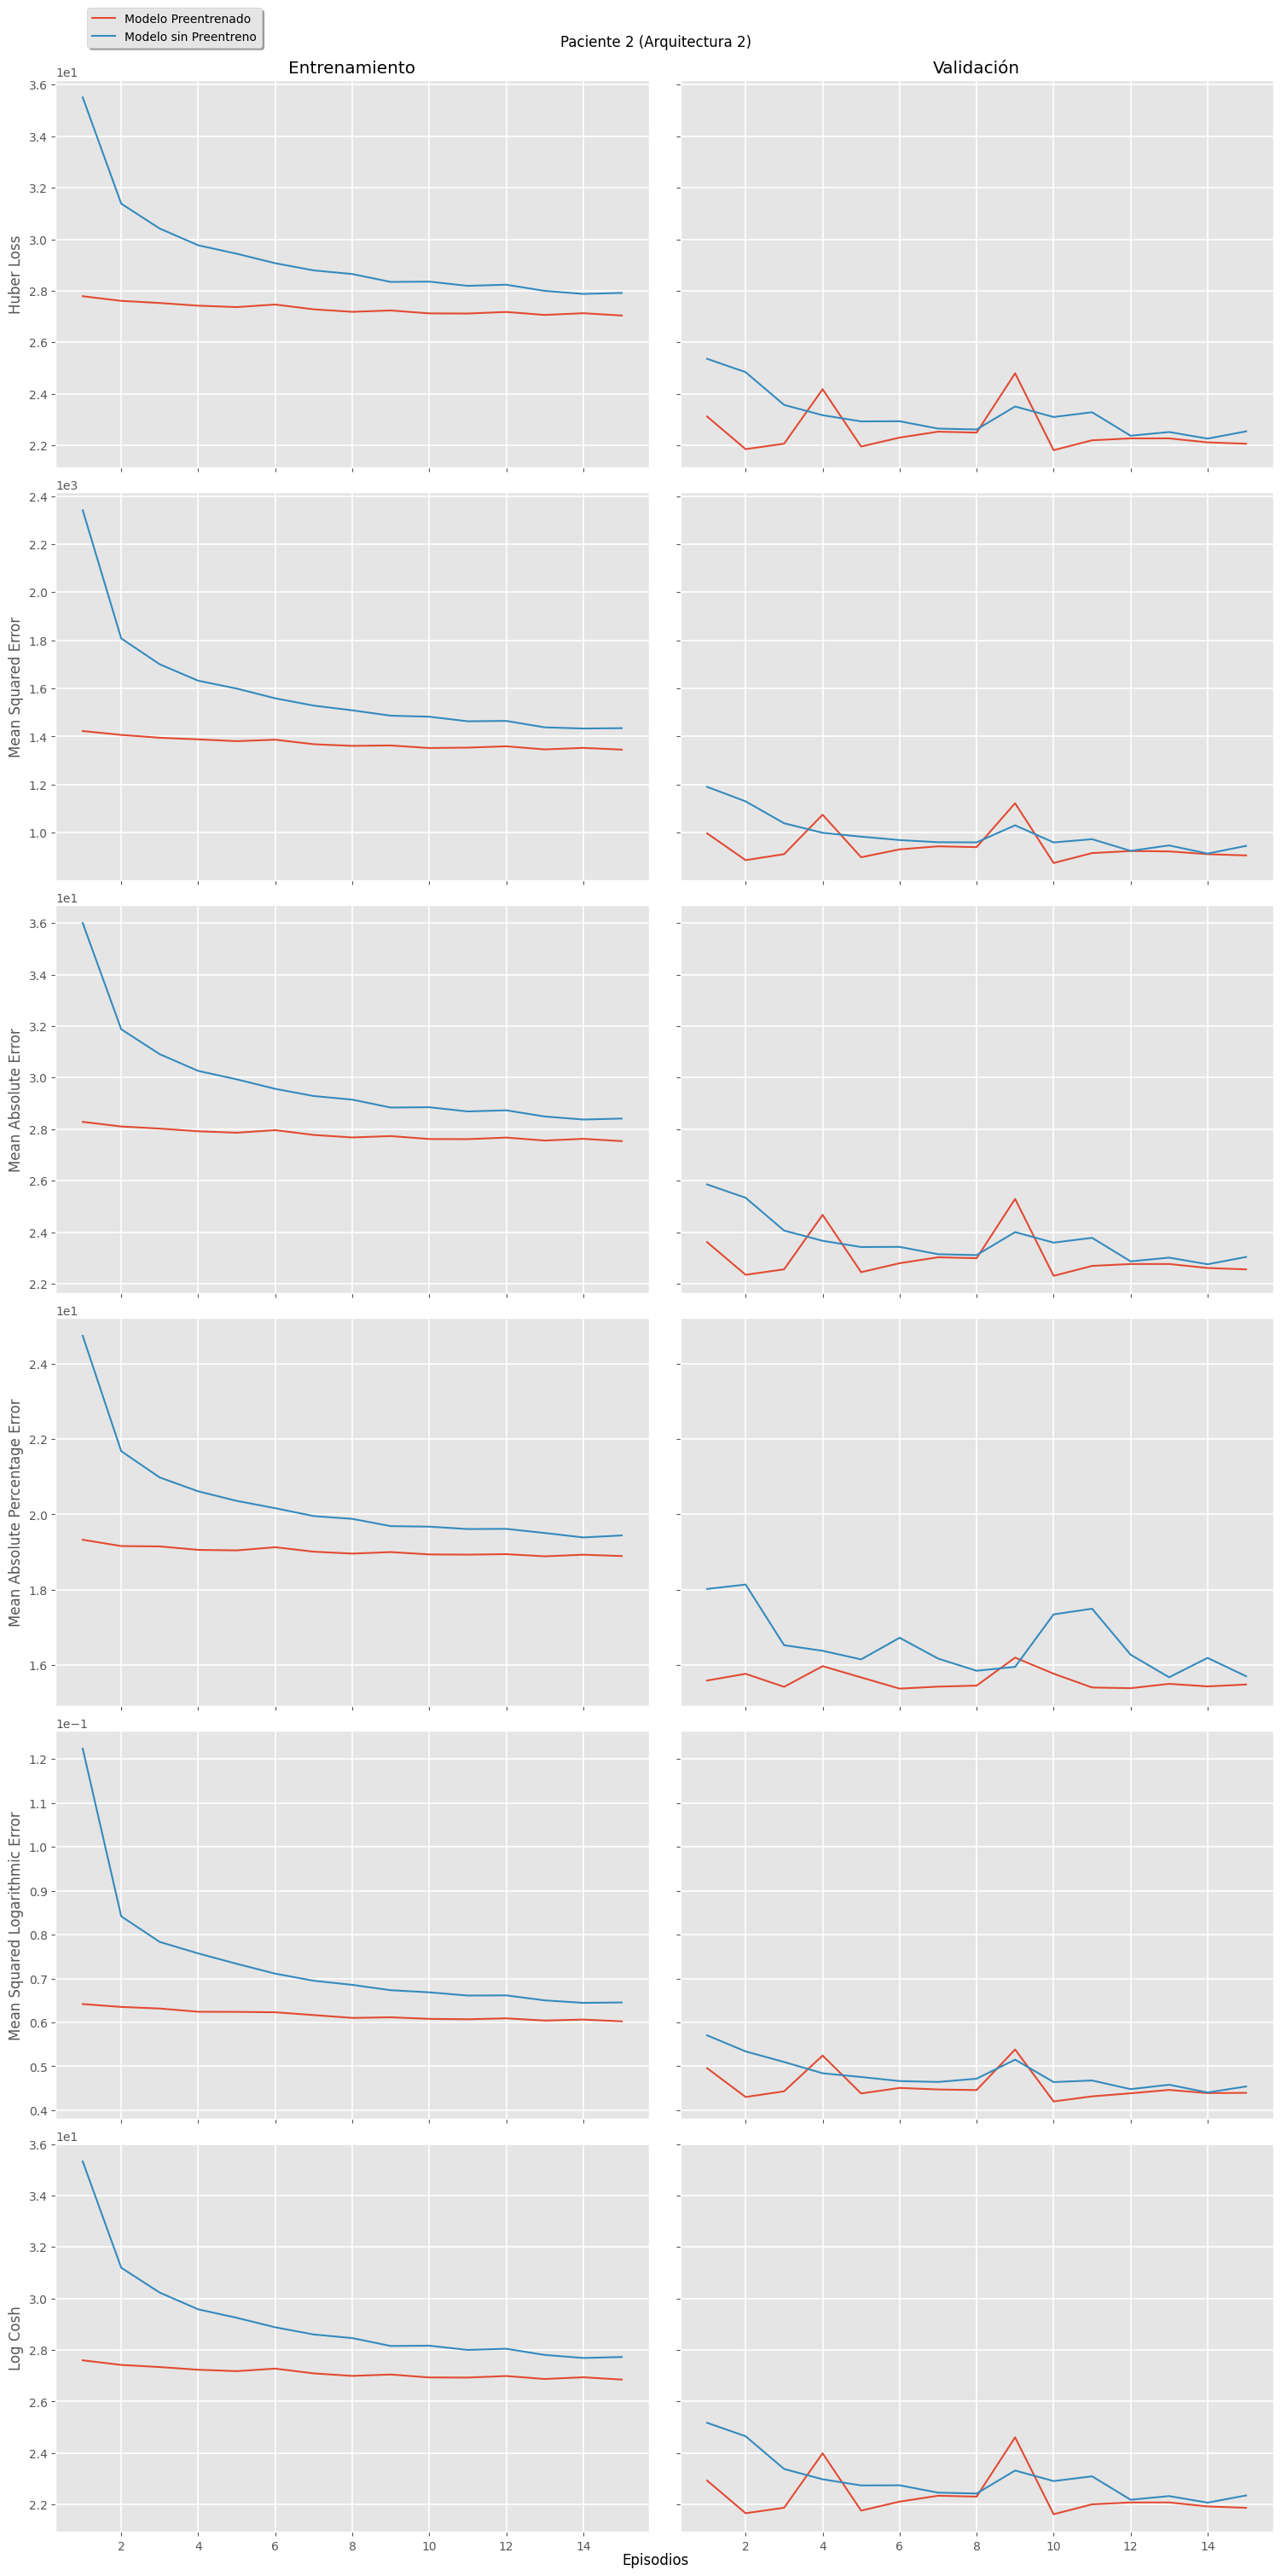

PATIENT_2



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

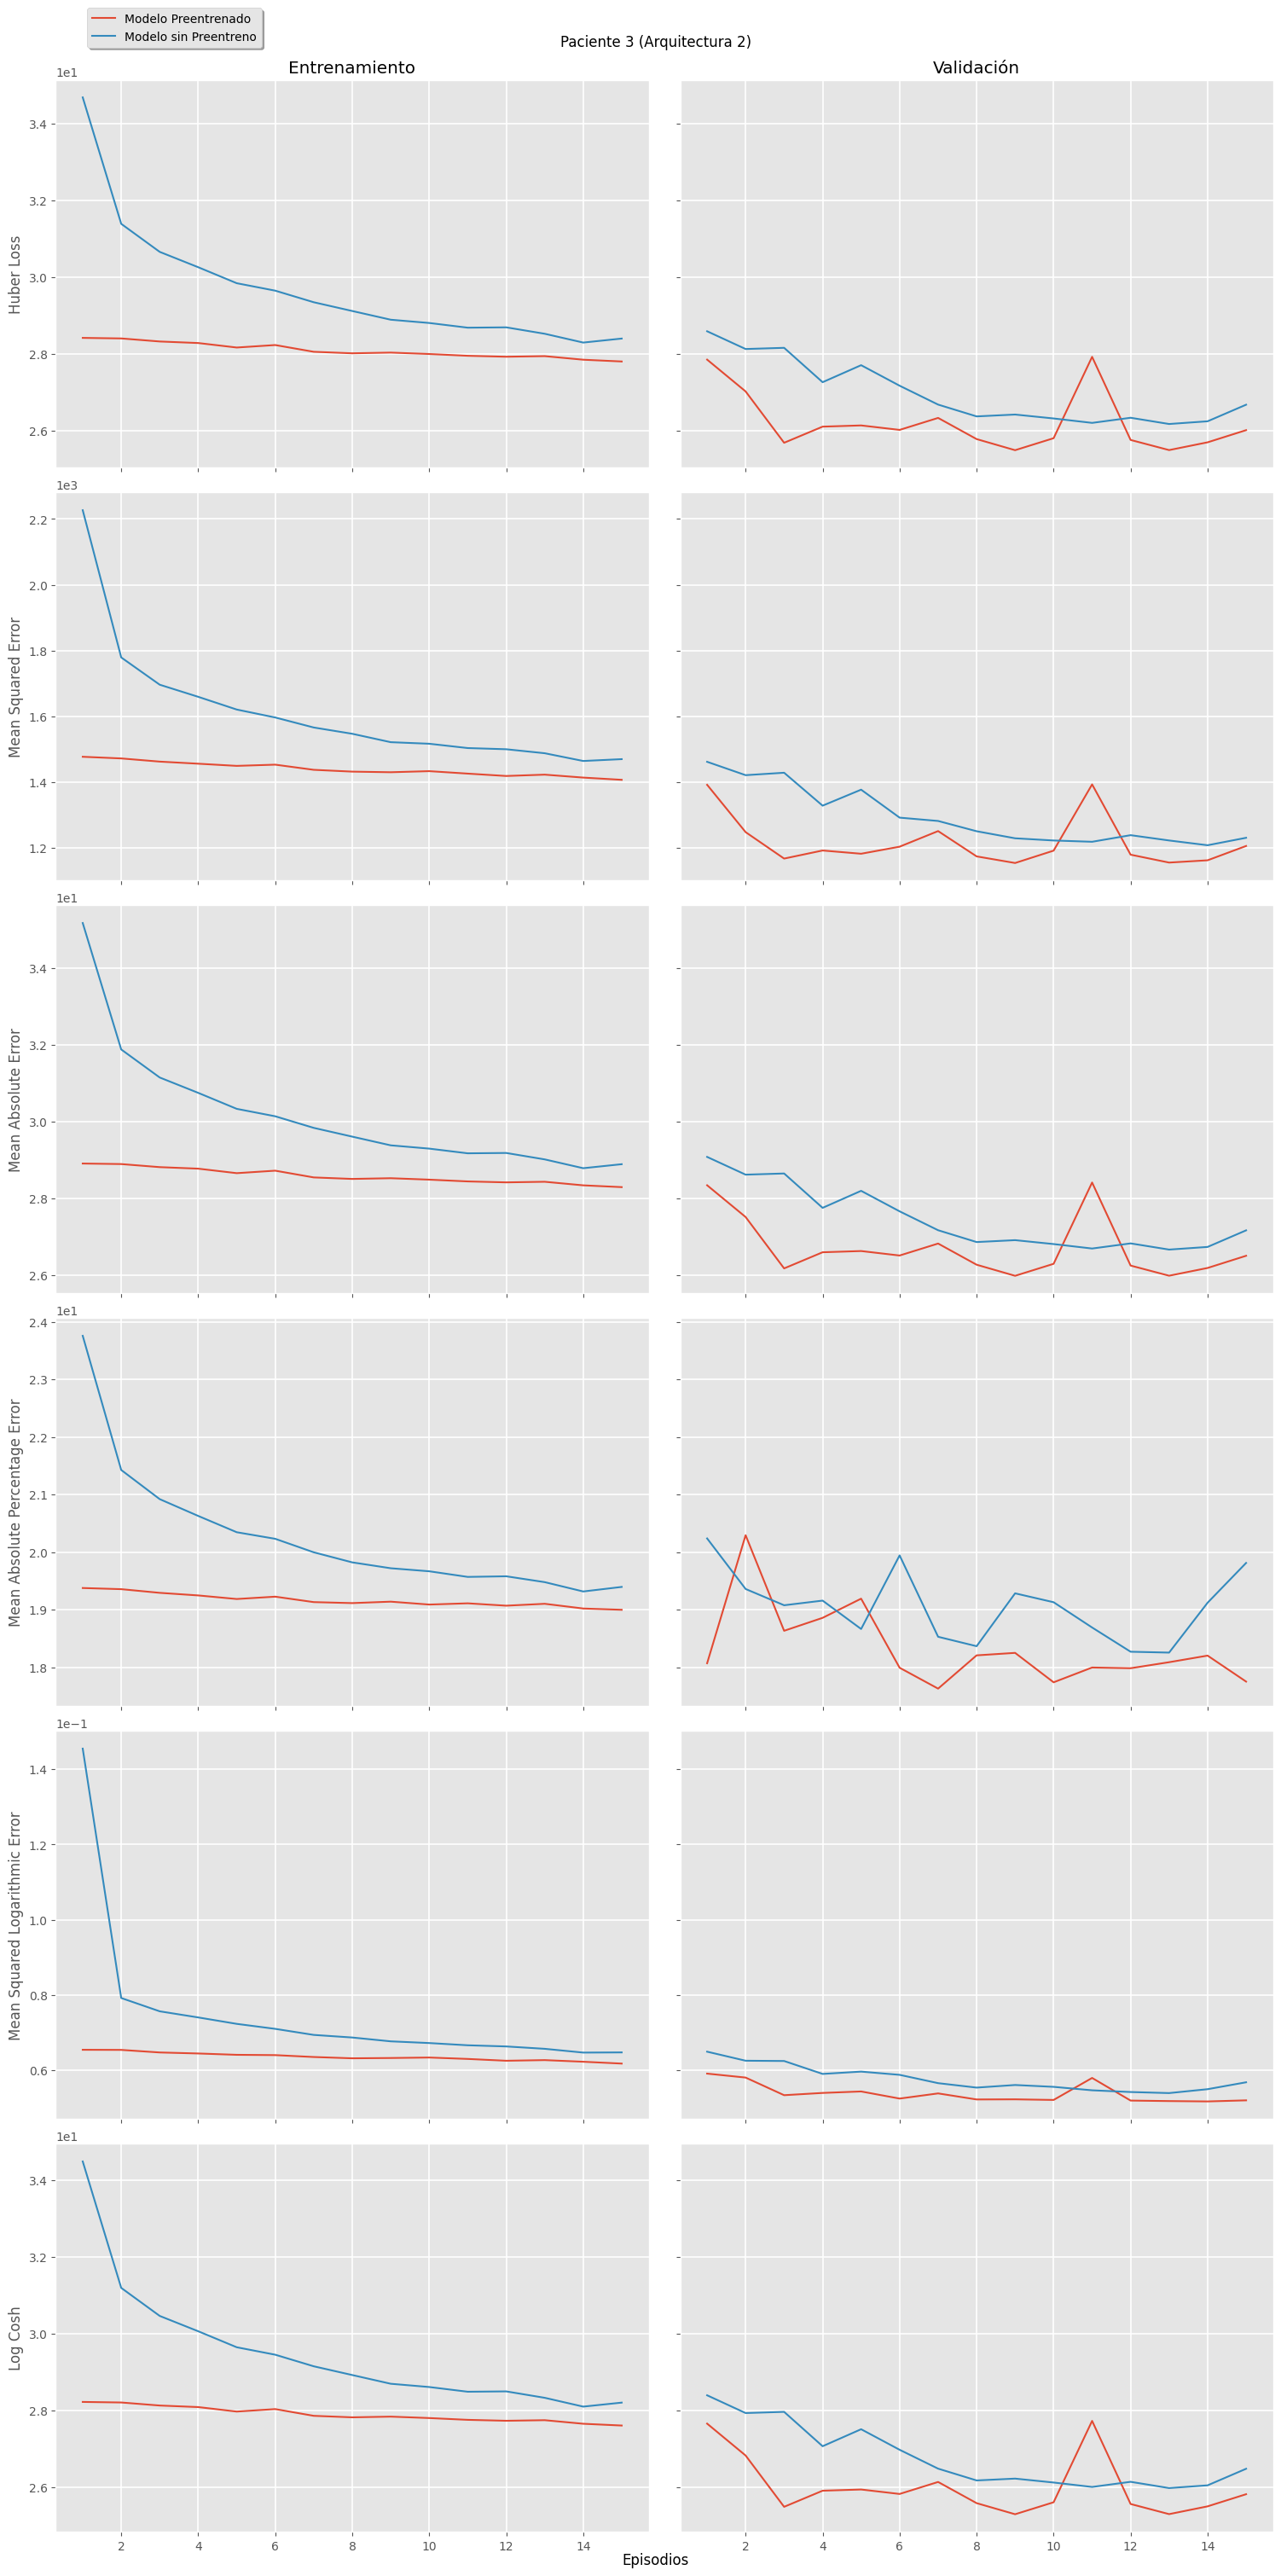

PATIENT_3



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

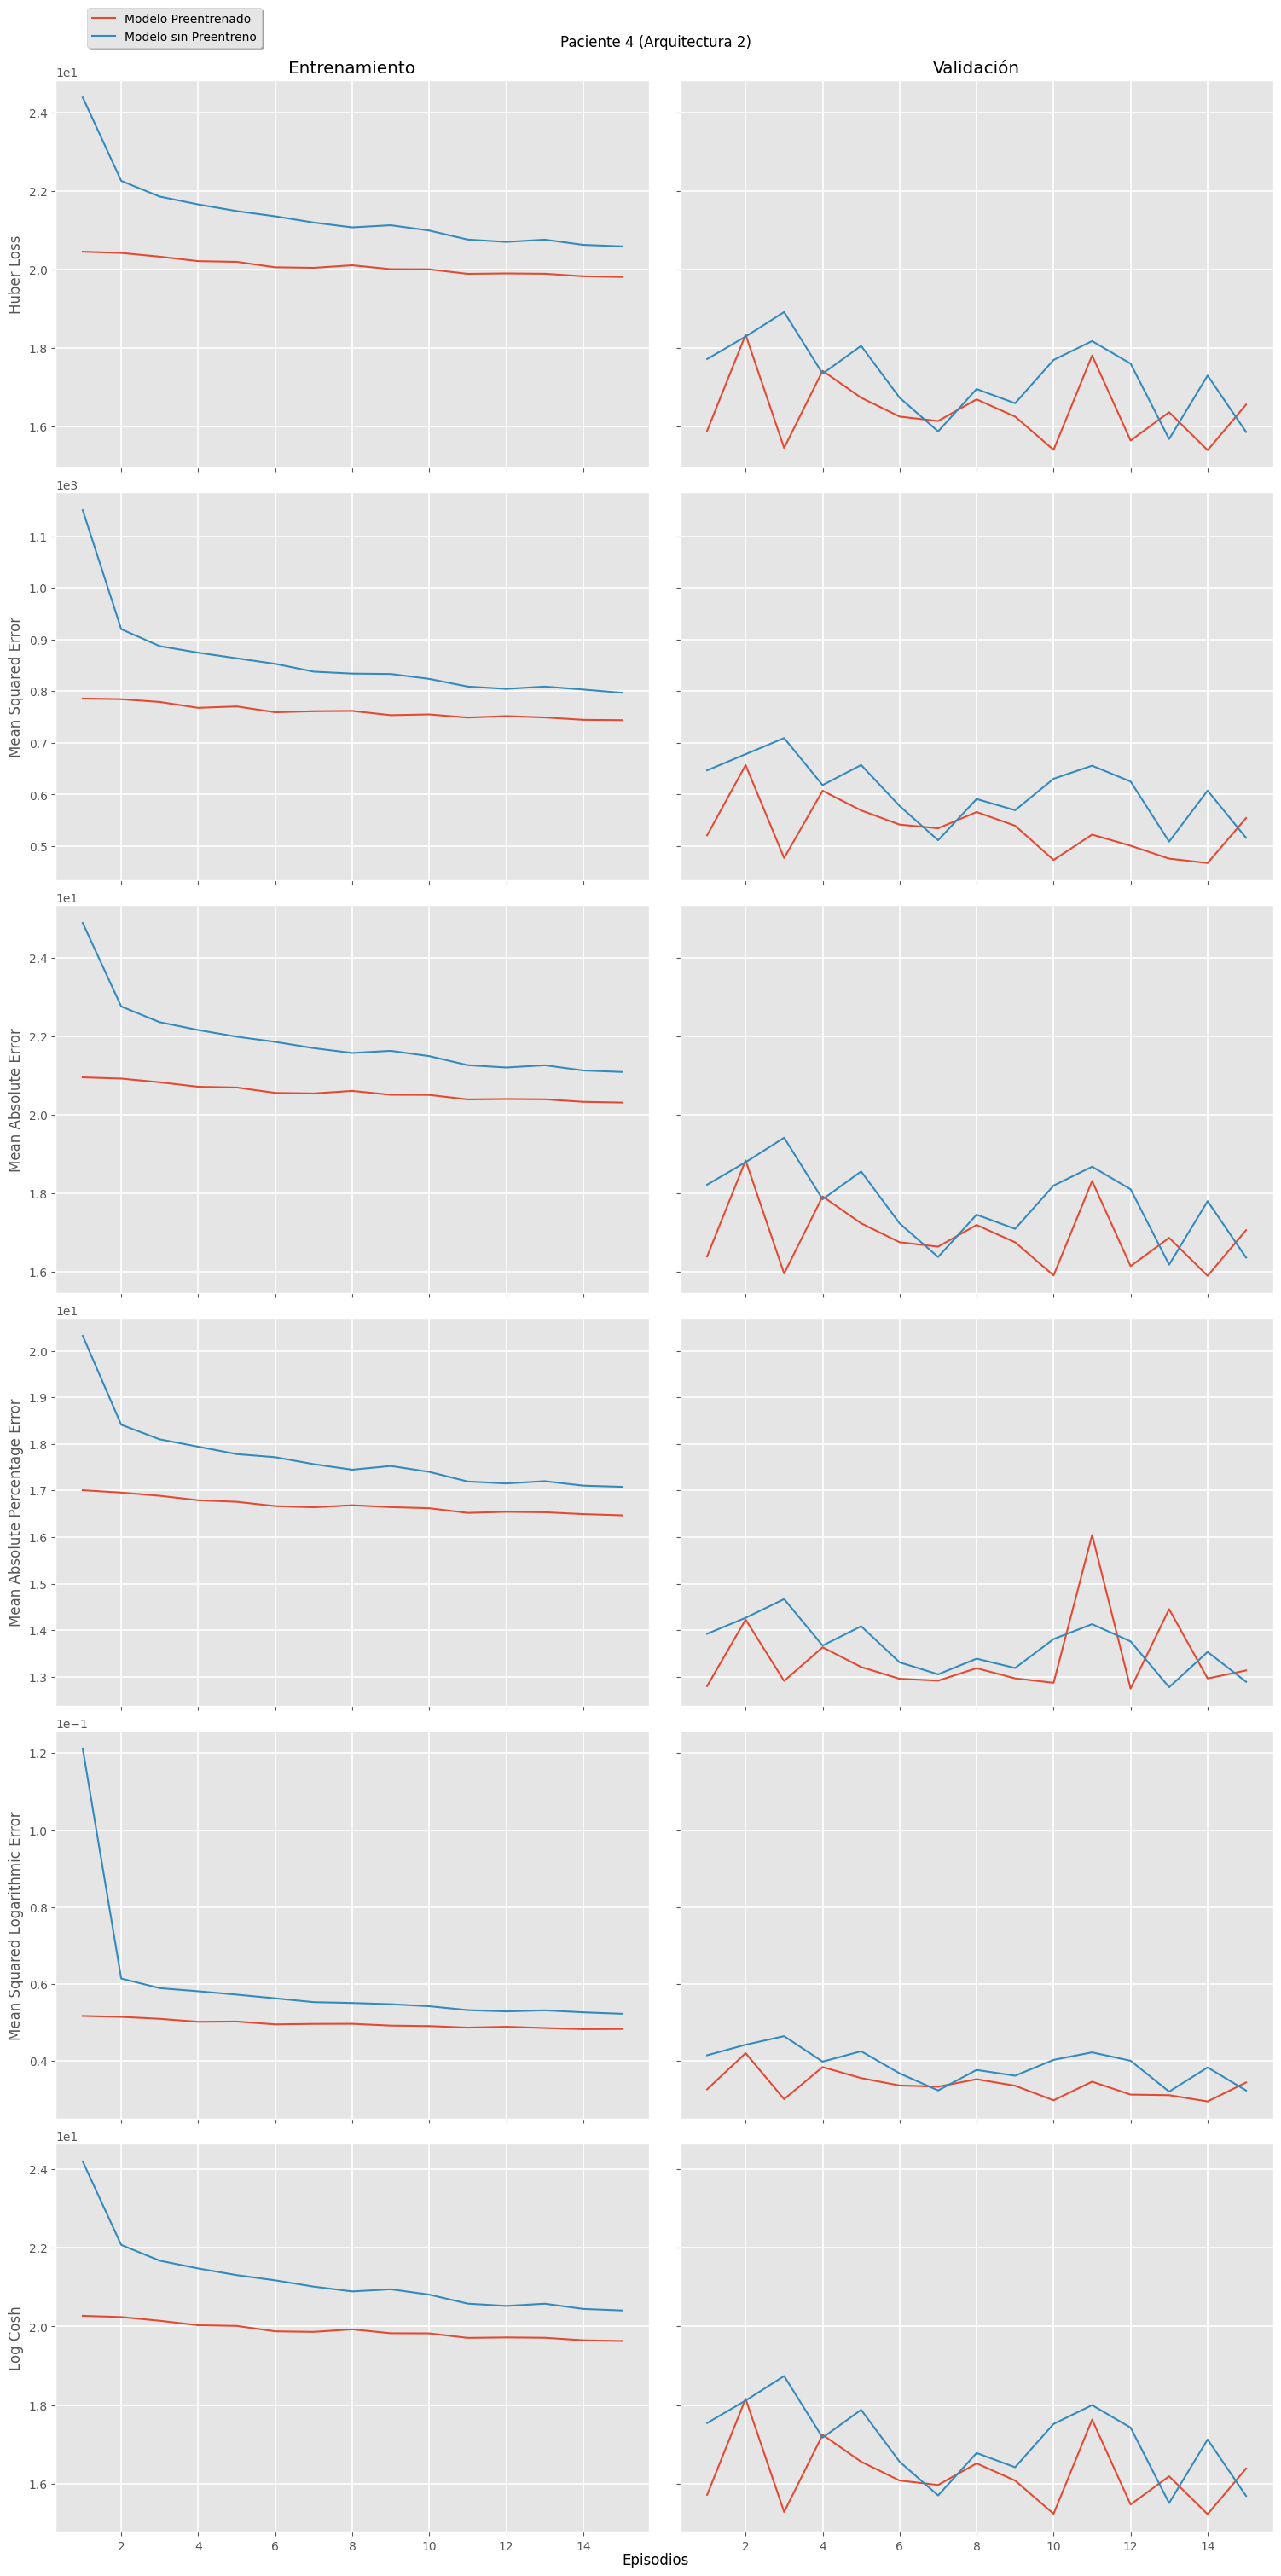

PATIENT_4



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

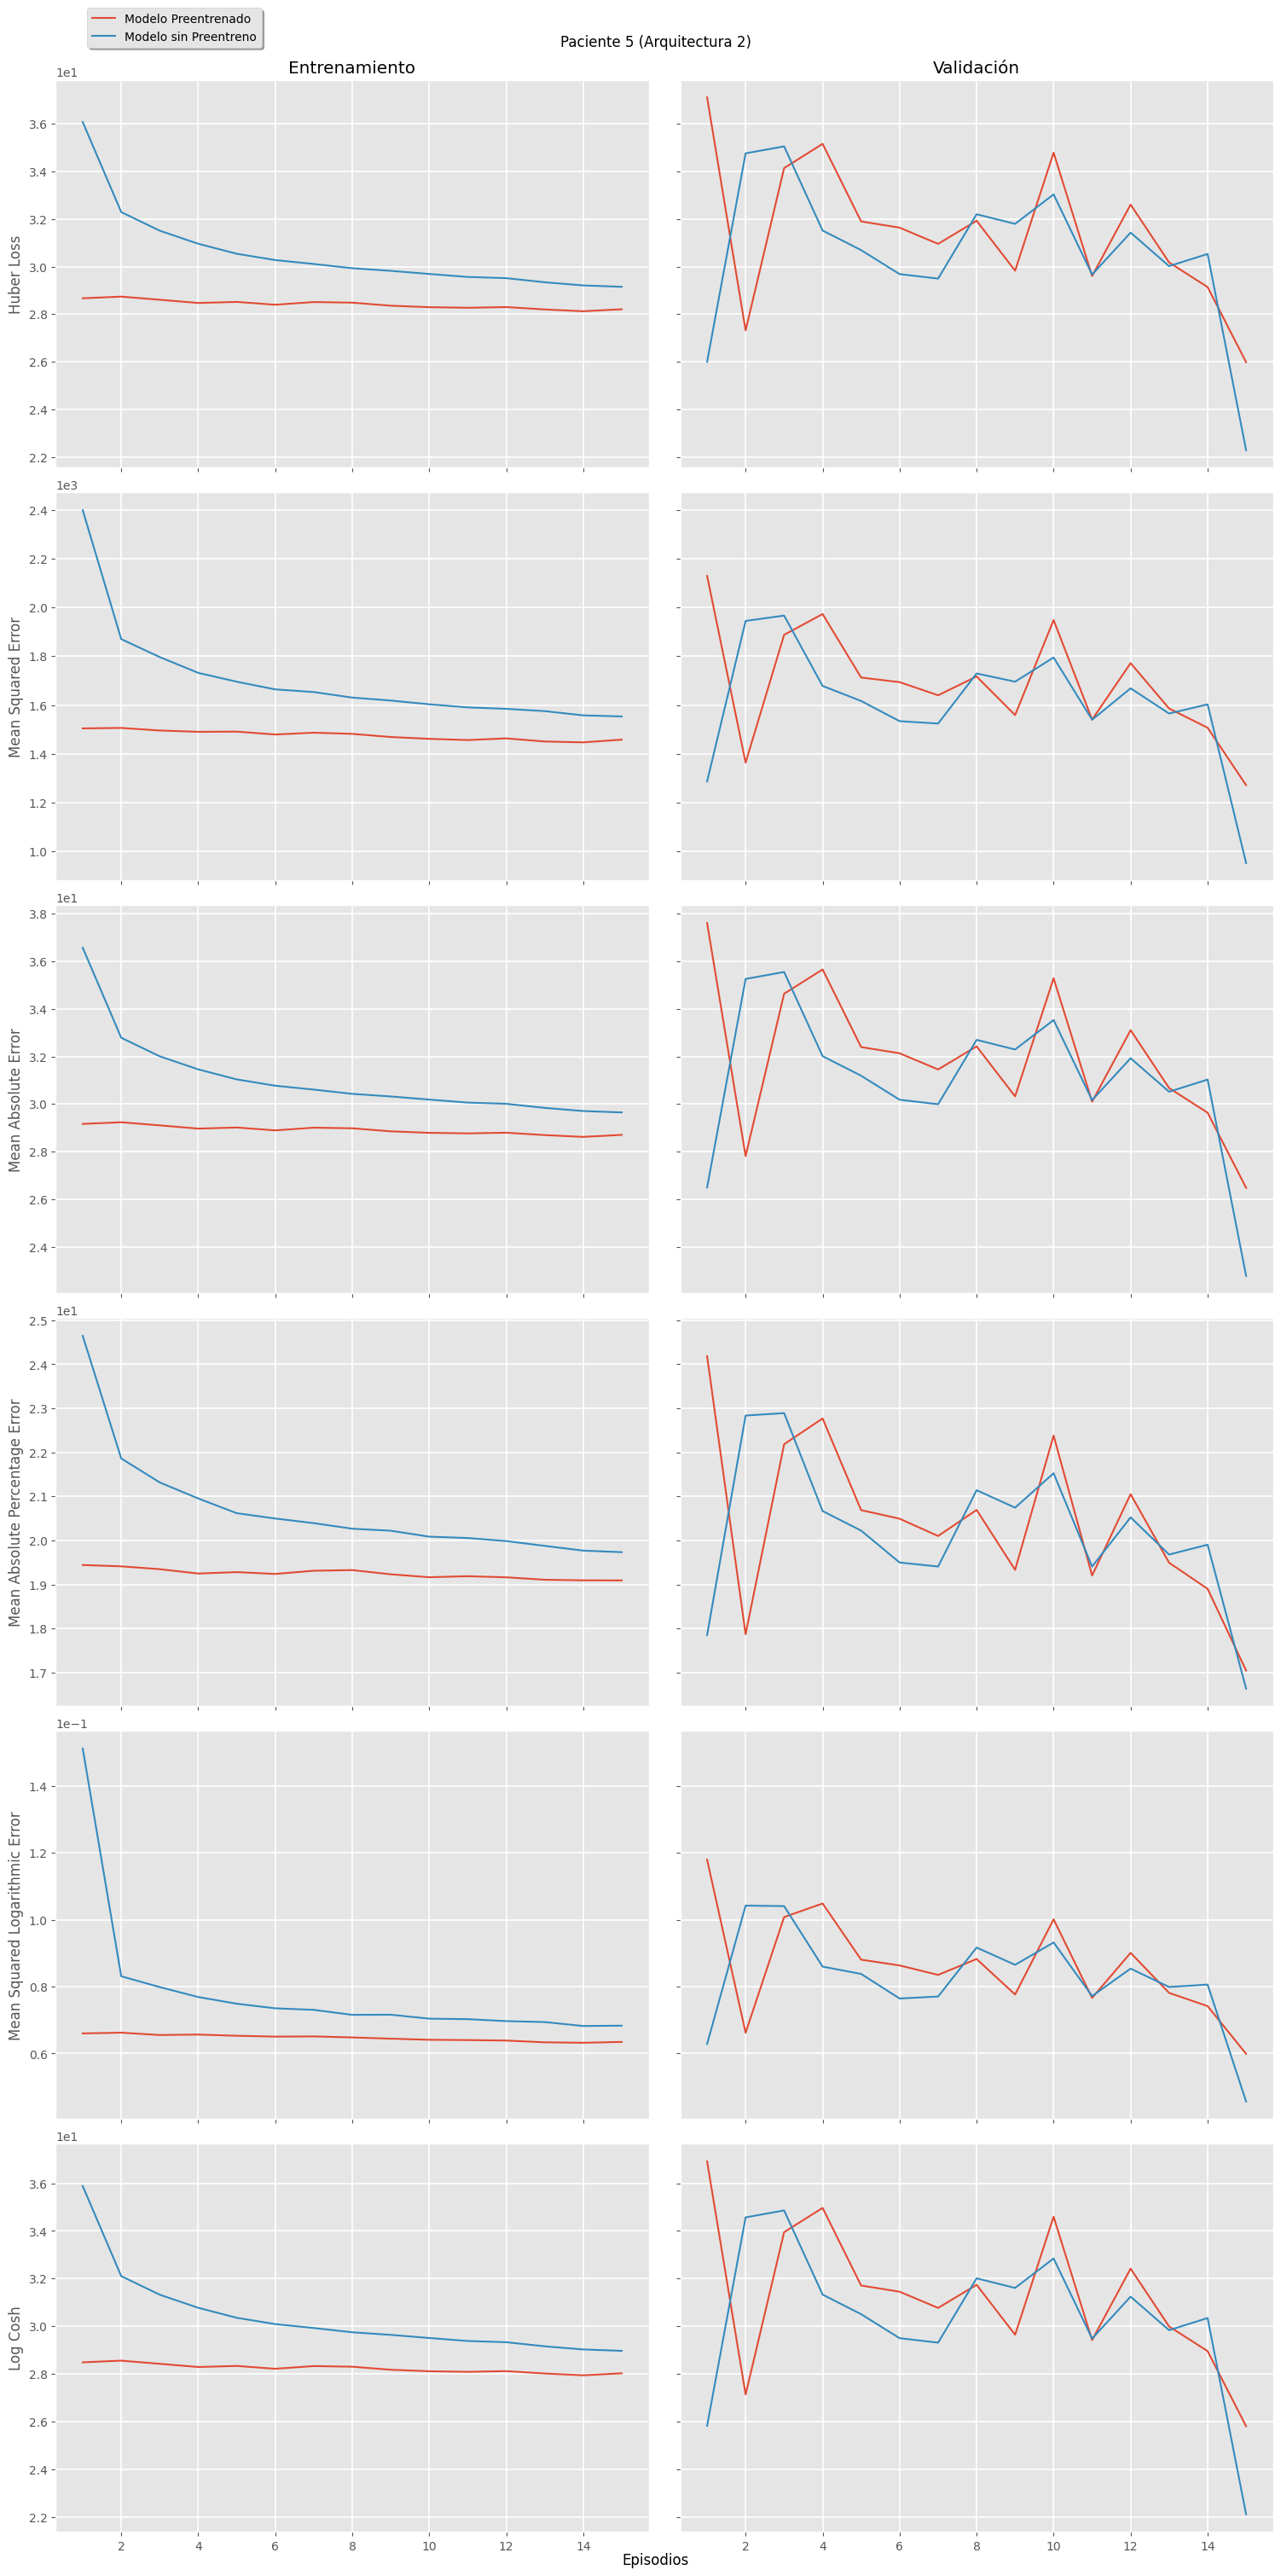

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ARCHITECTURE_3

['loss', 'huber_loss', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error', 'log_cosh']
PATIENT_0



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

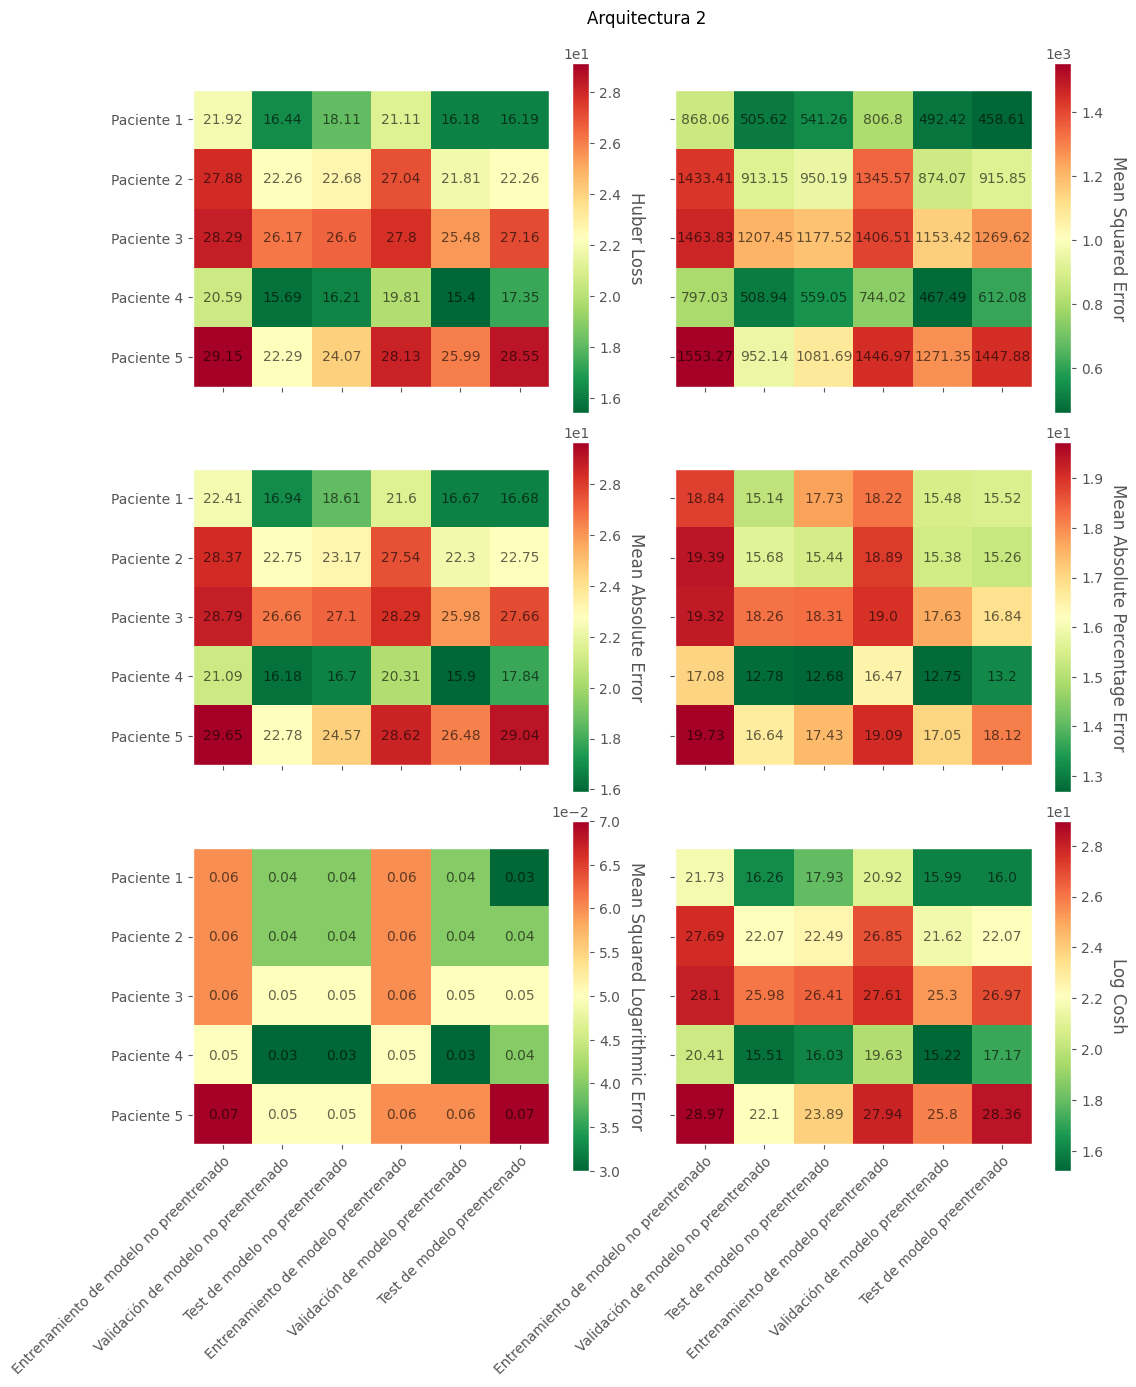

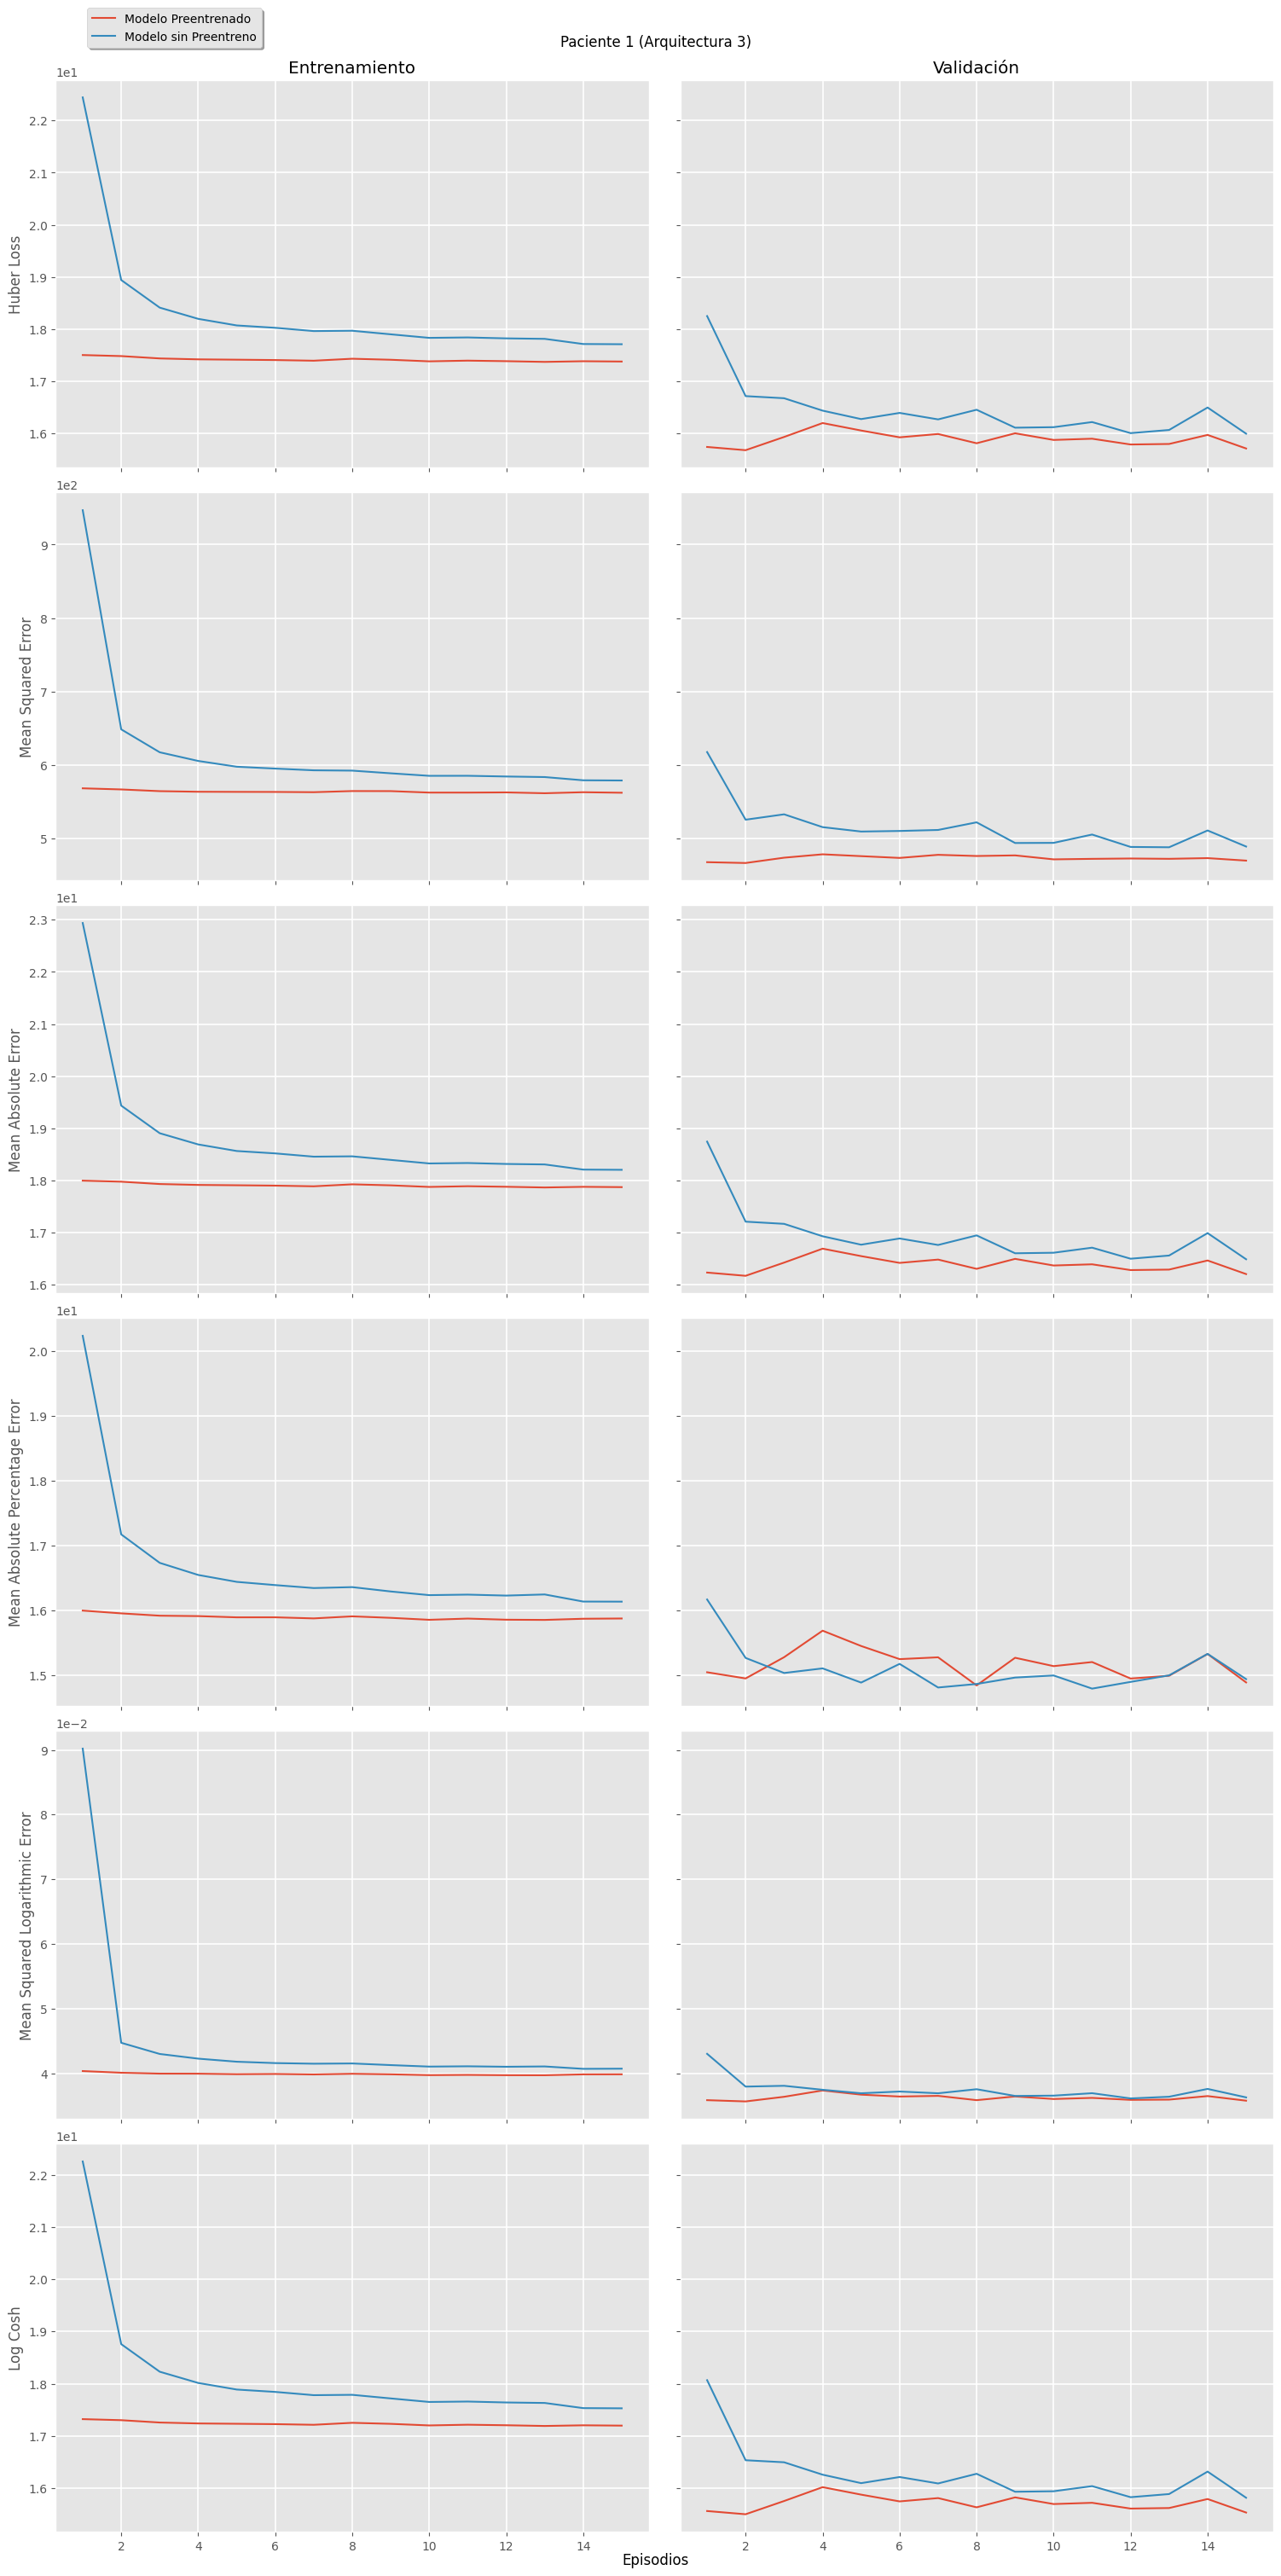

PATIENT_1



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

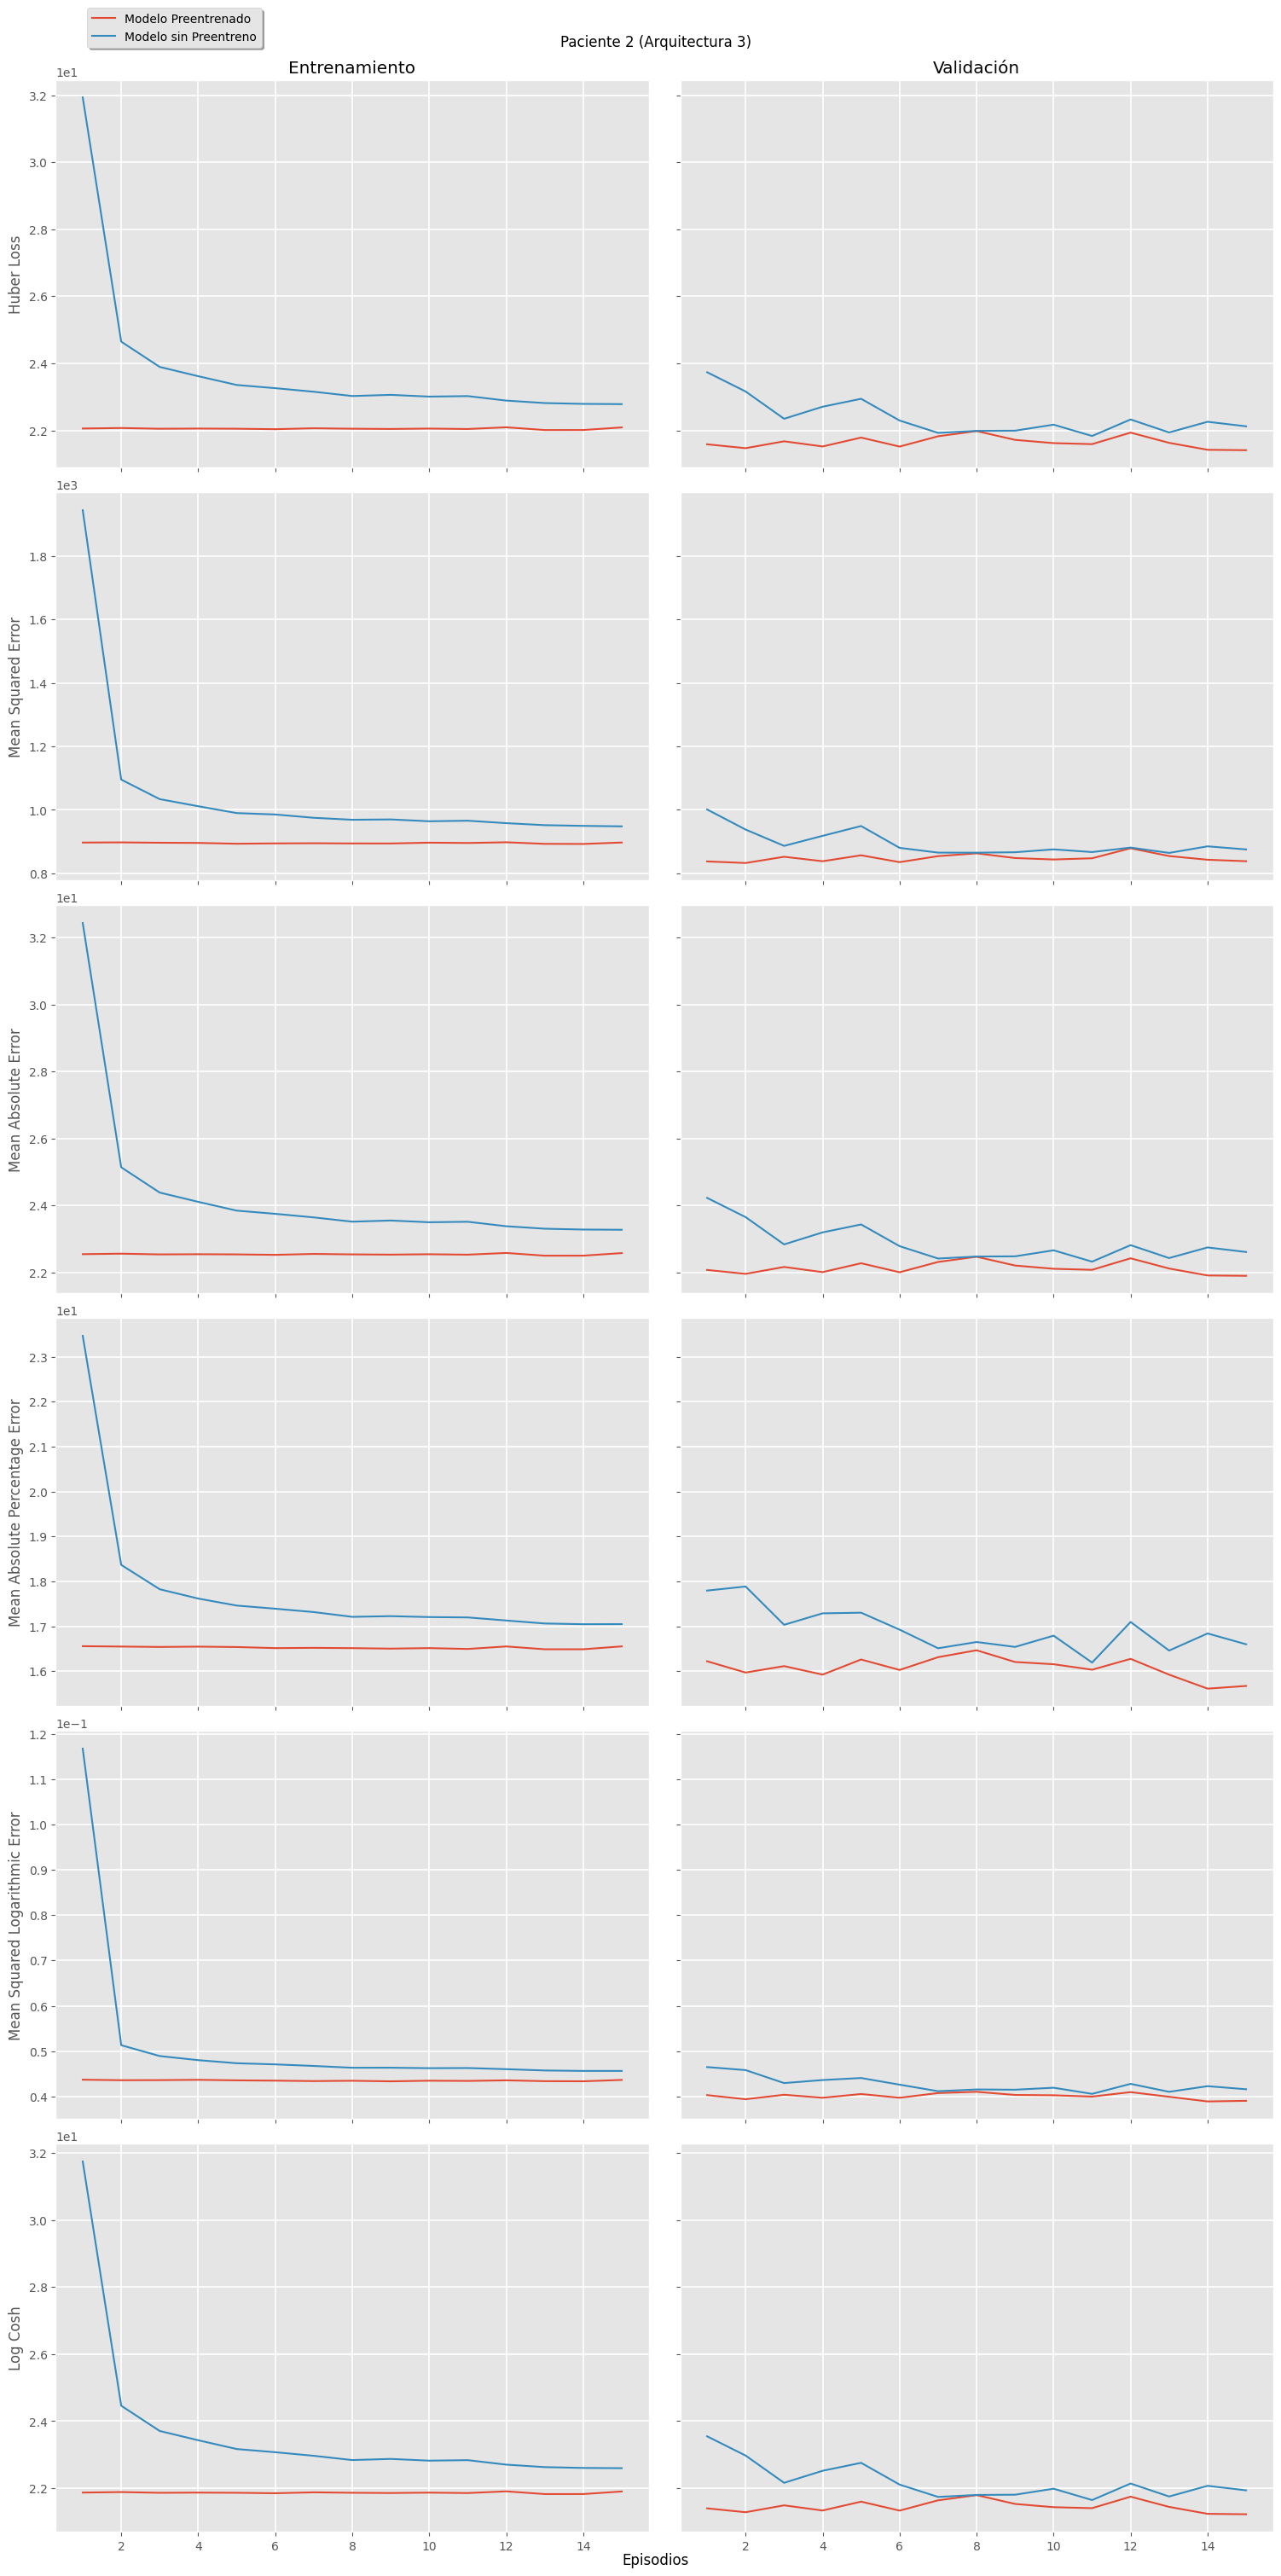

PATIENT_2



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

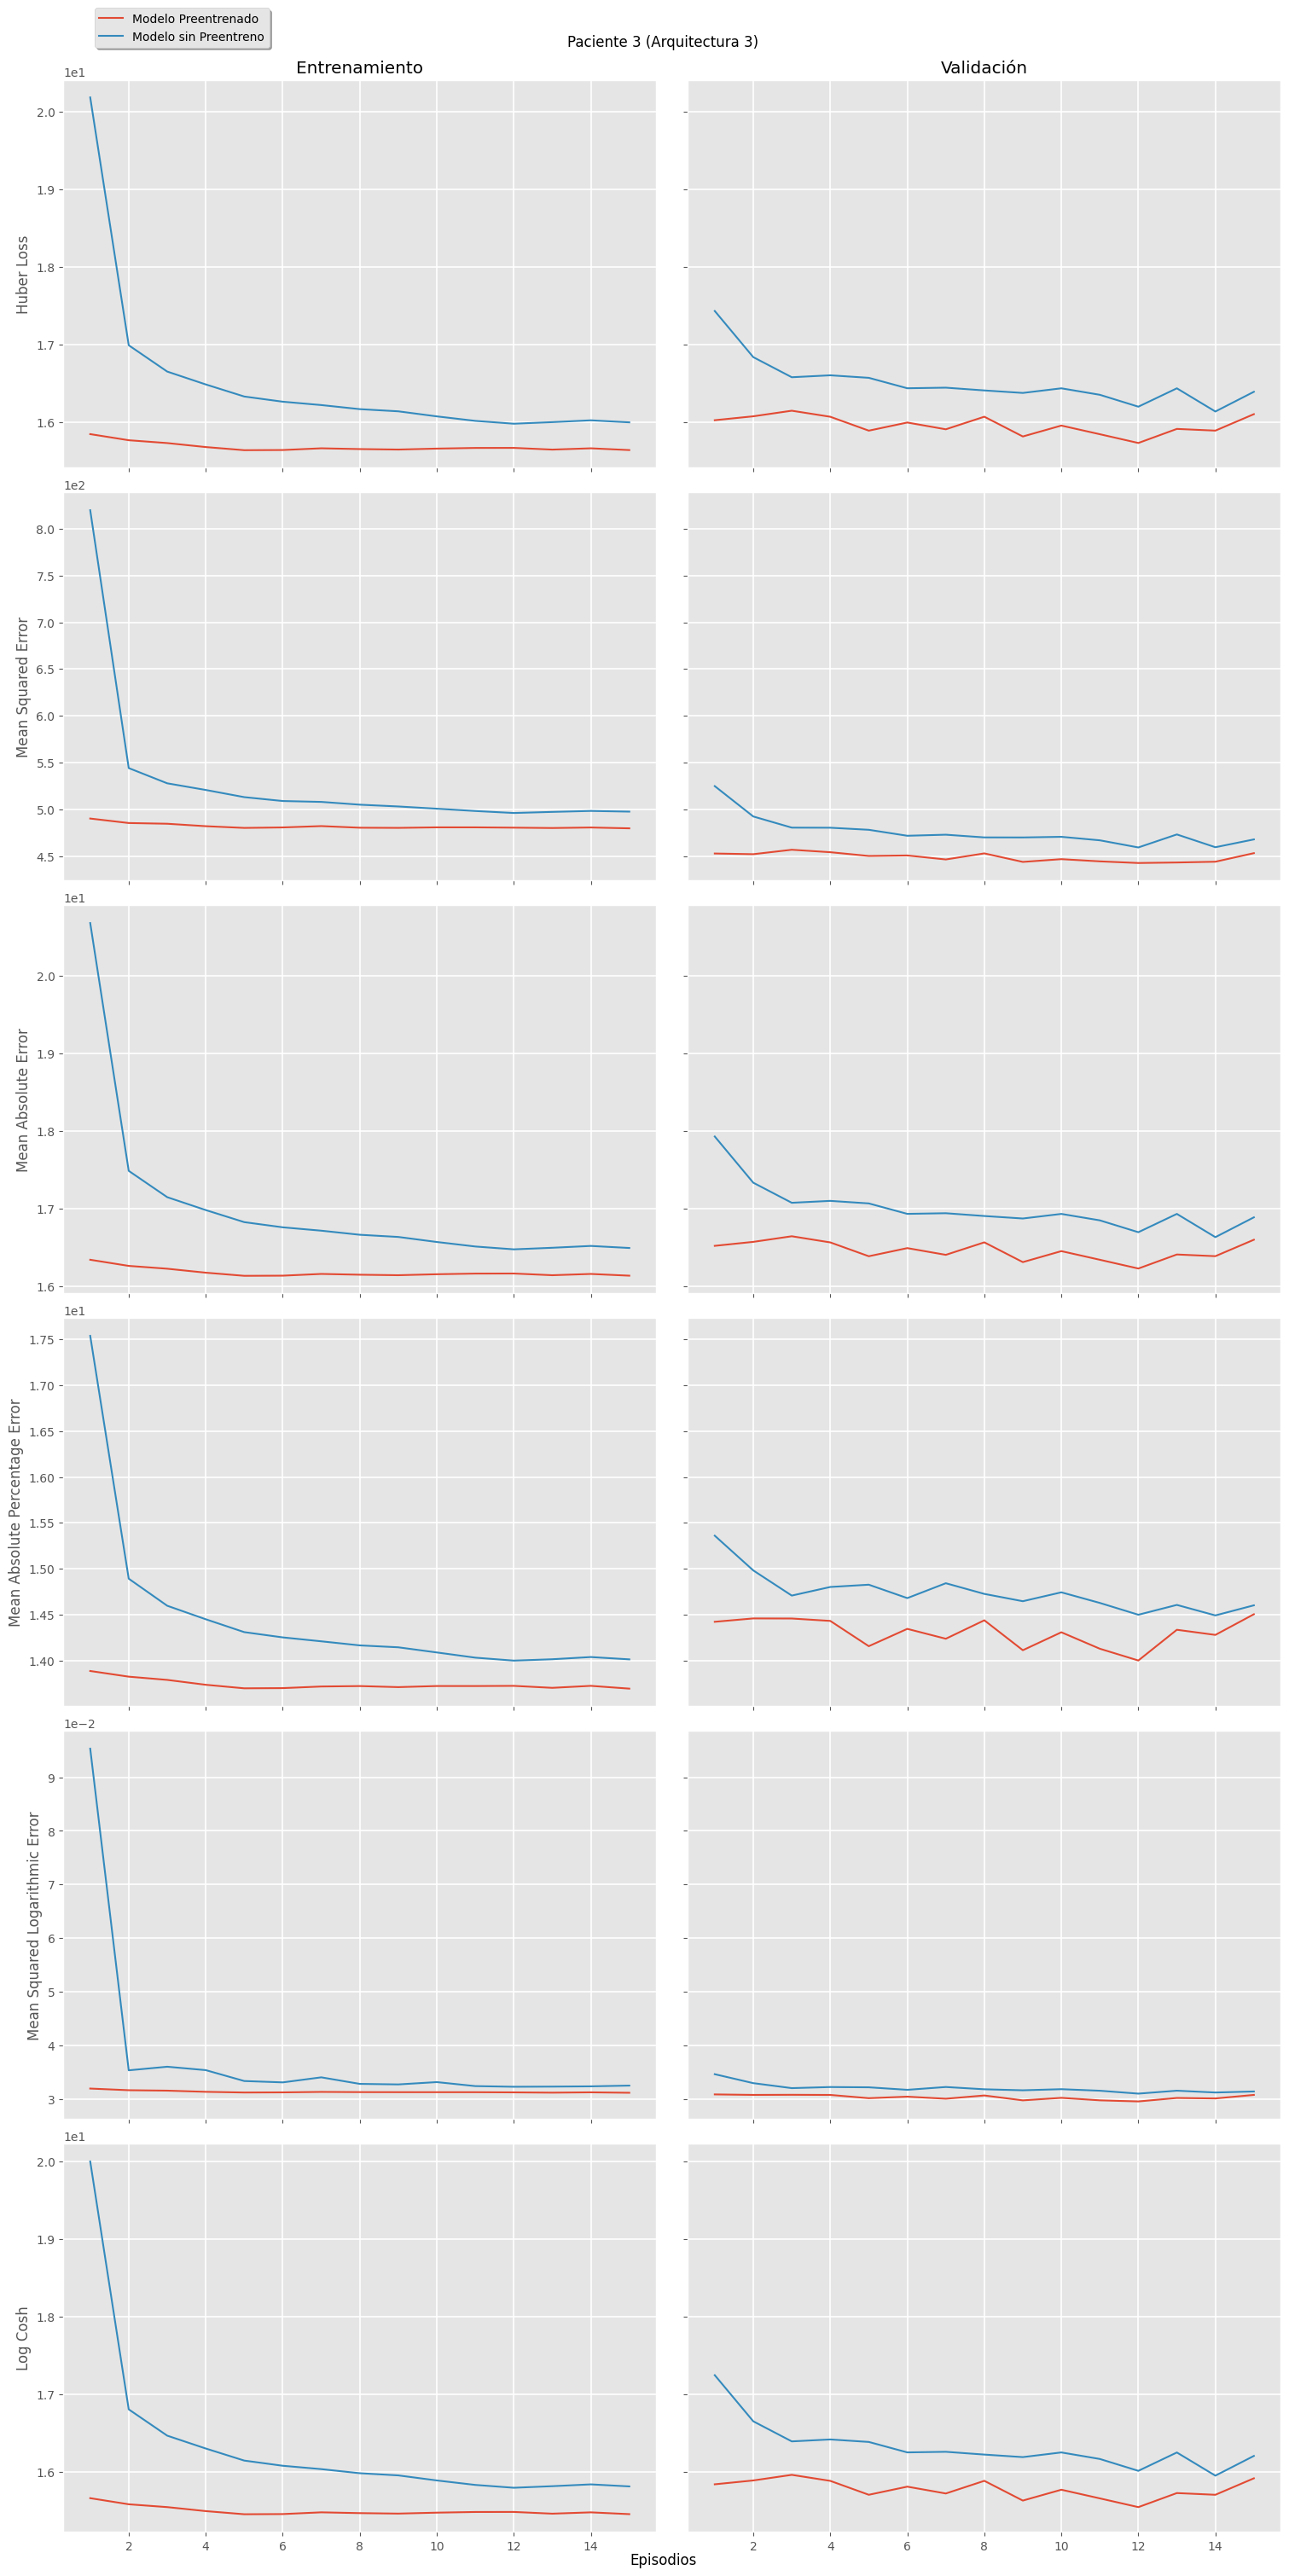

PATIENT_3



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

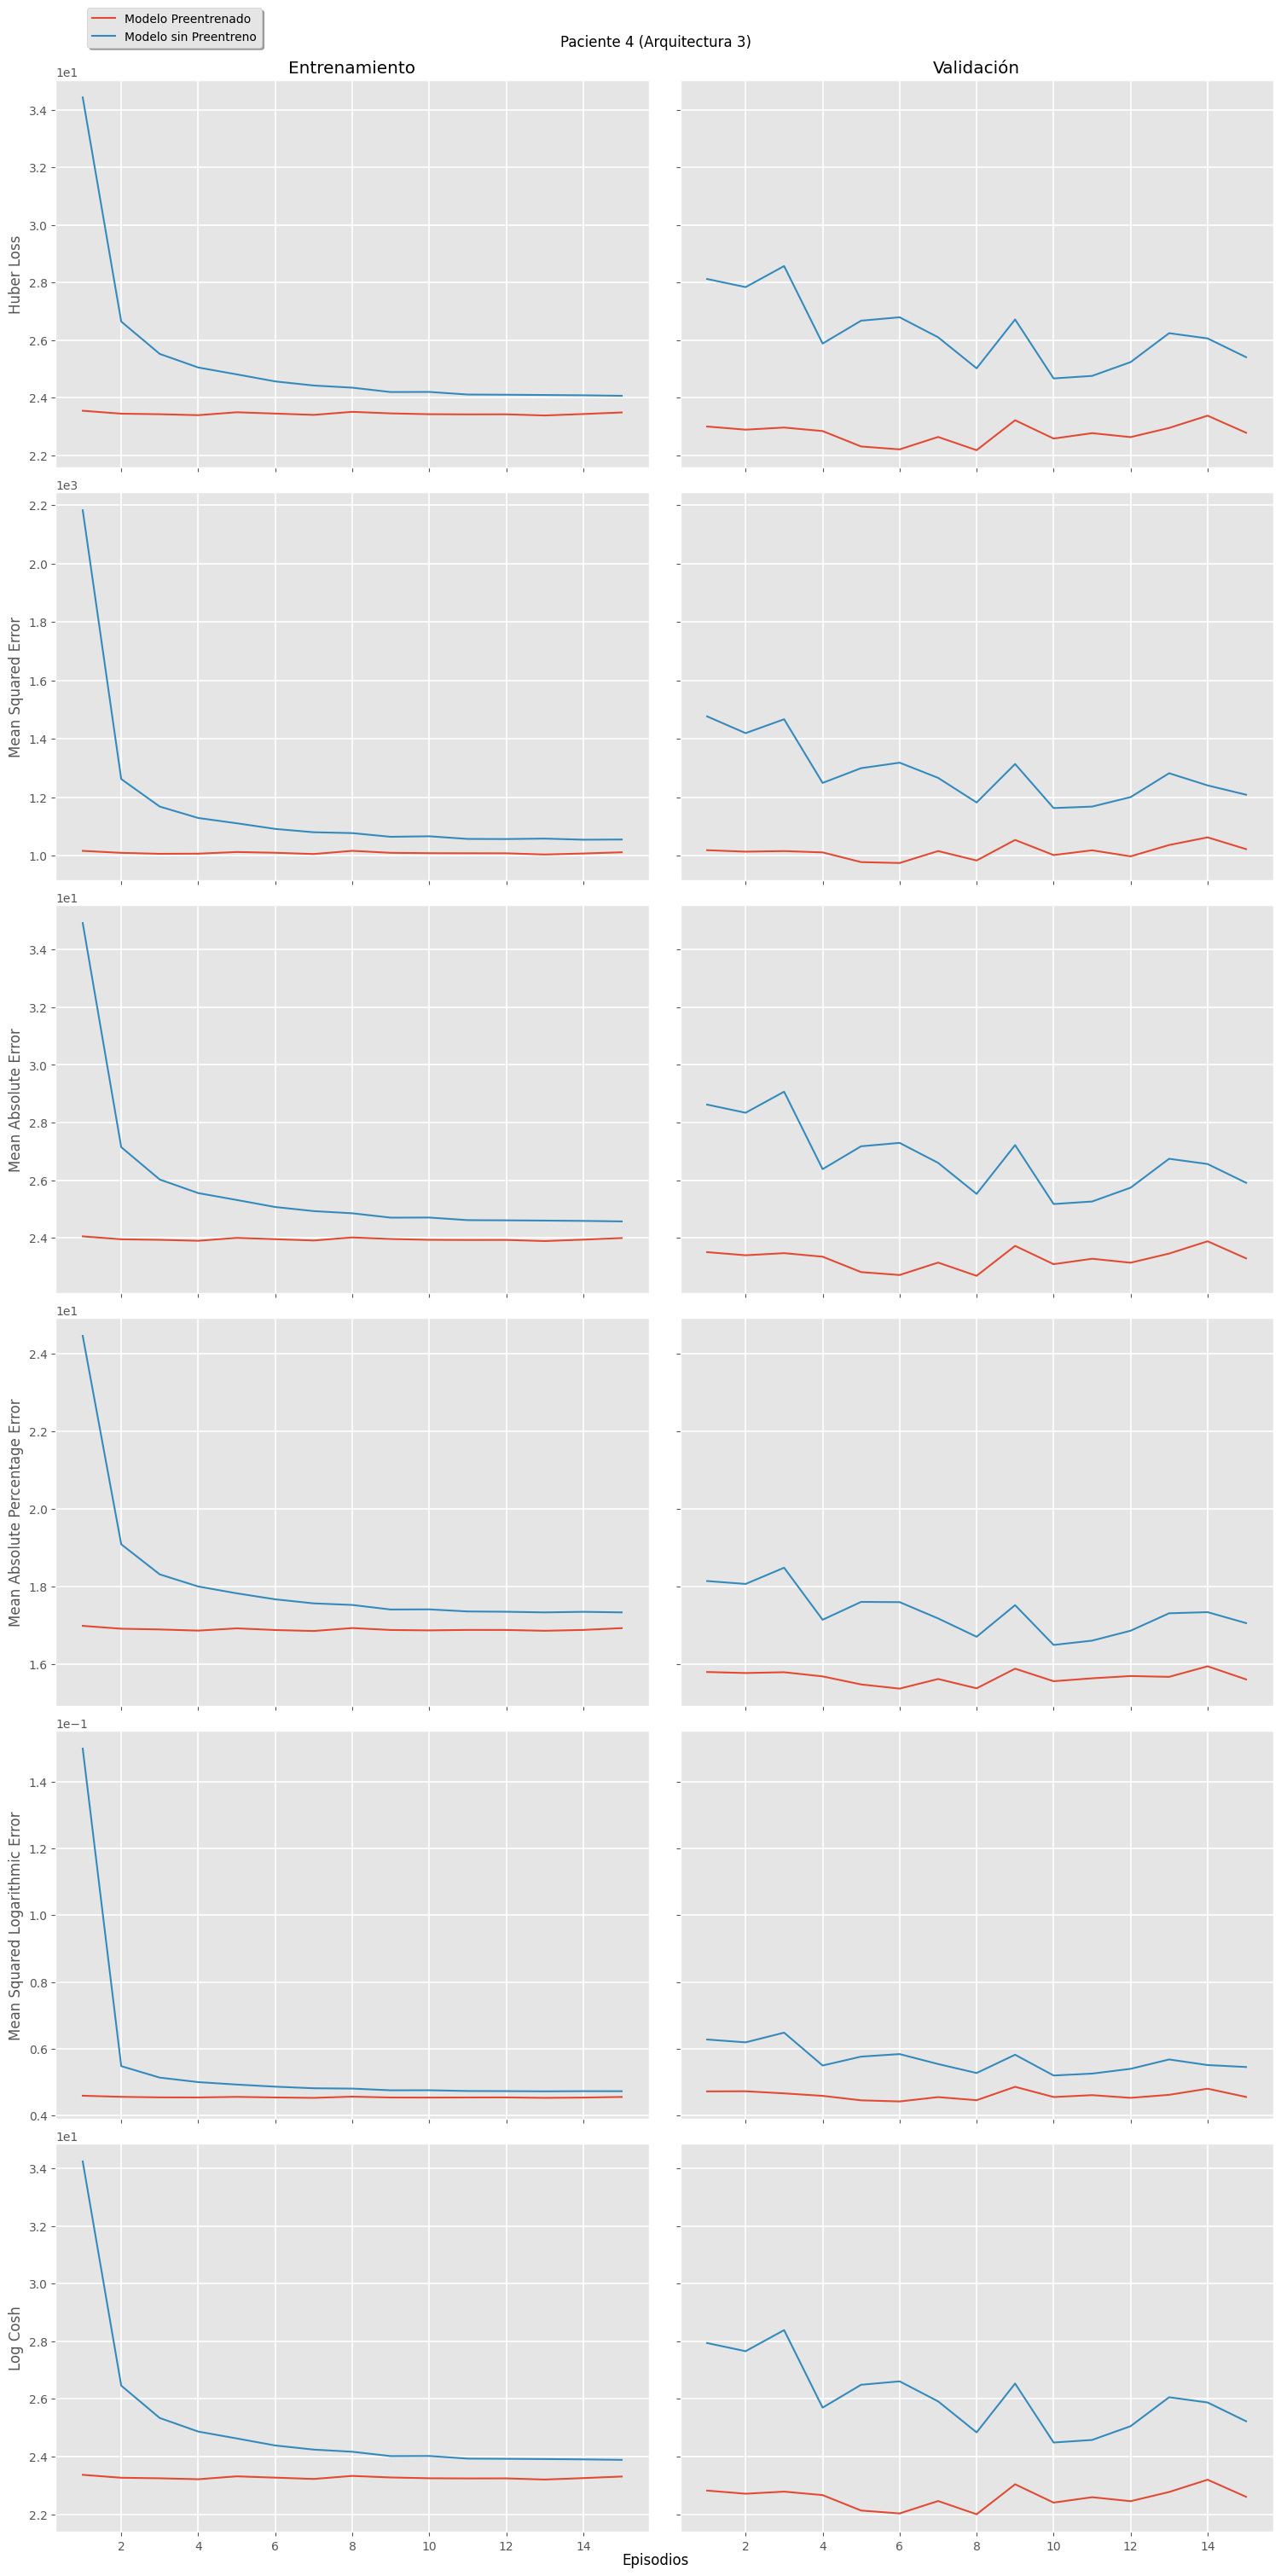

PATIENT_4



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

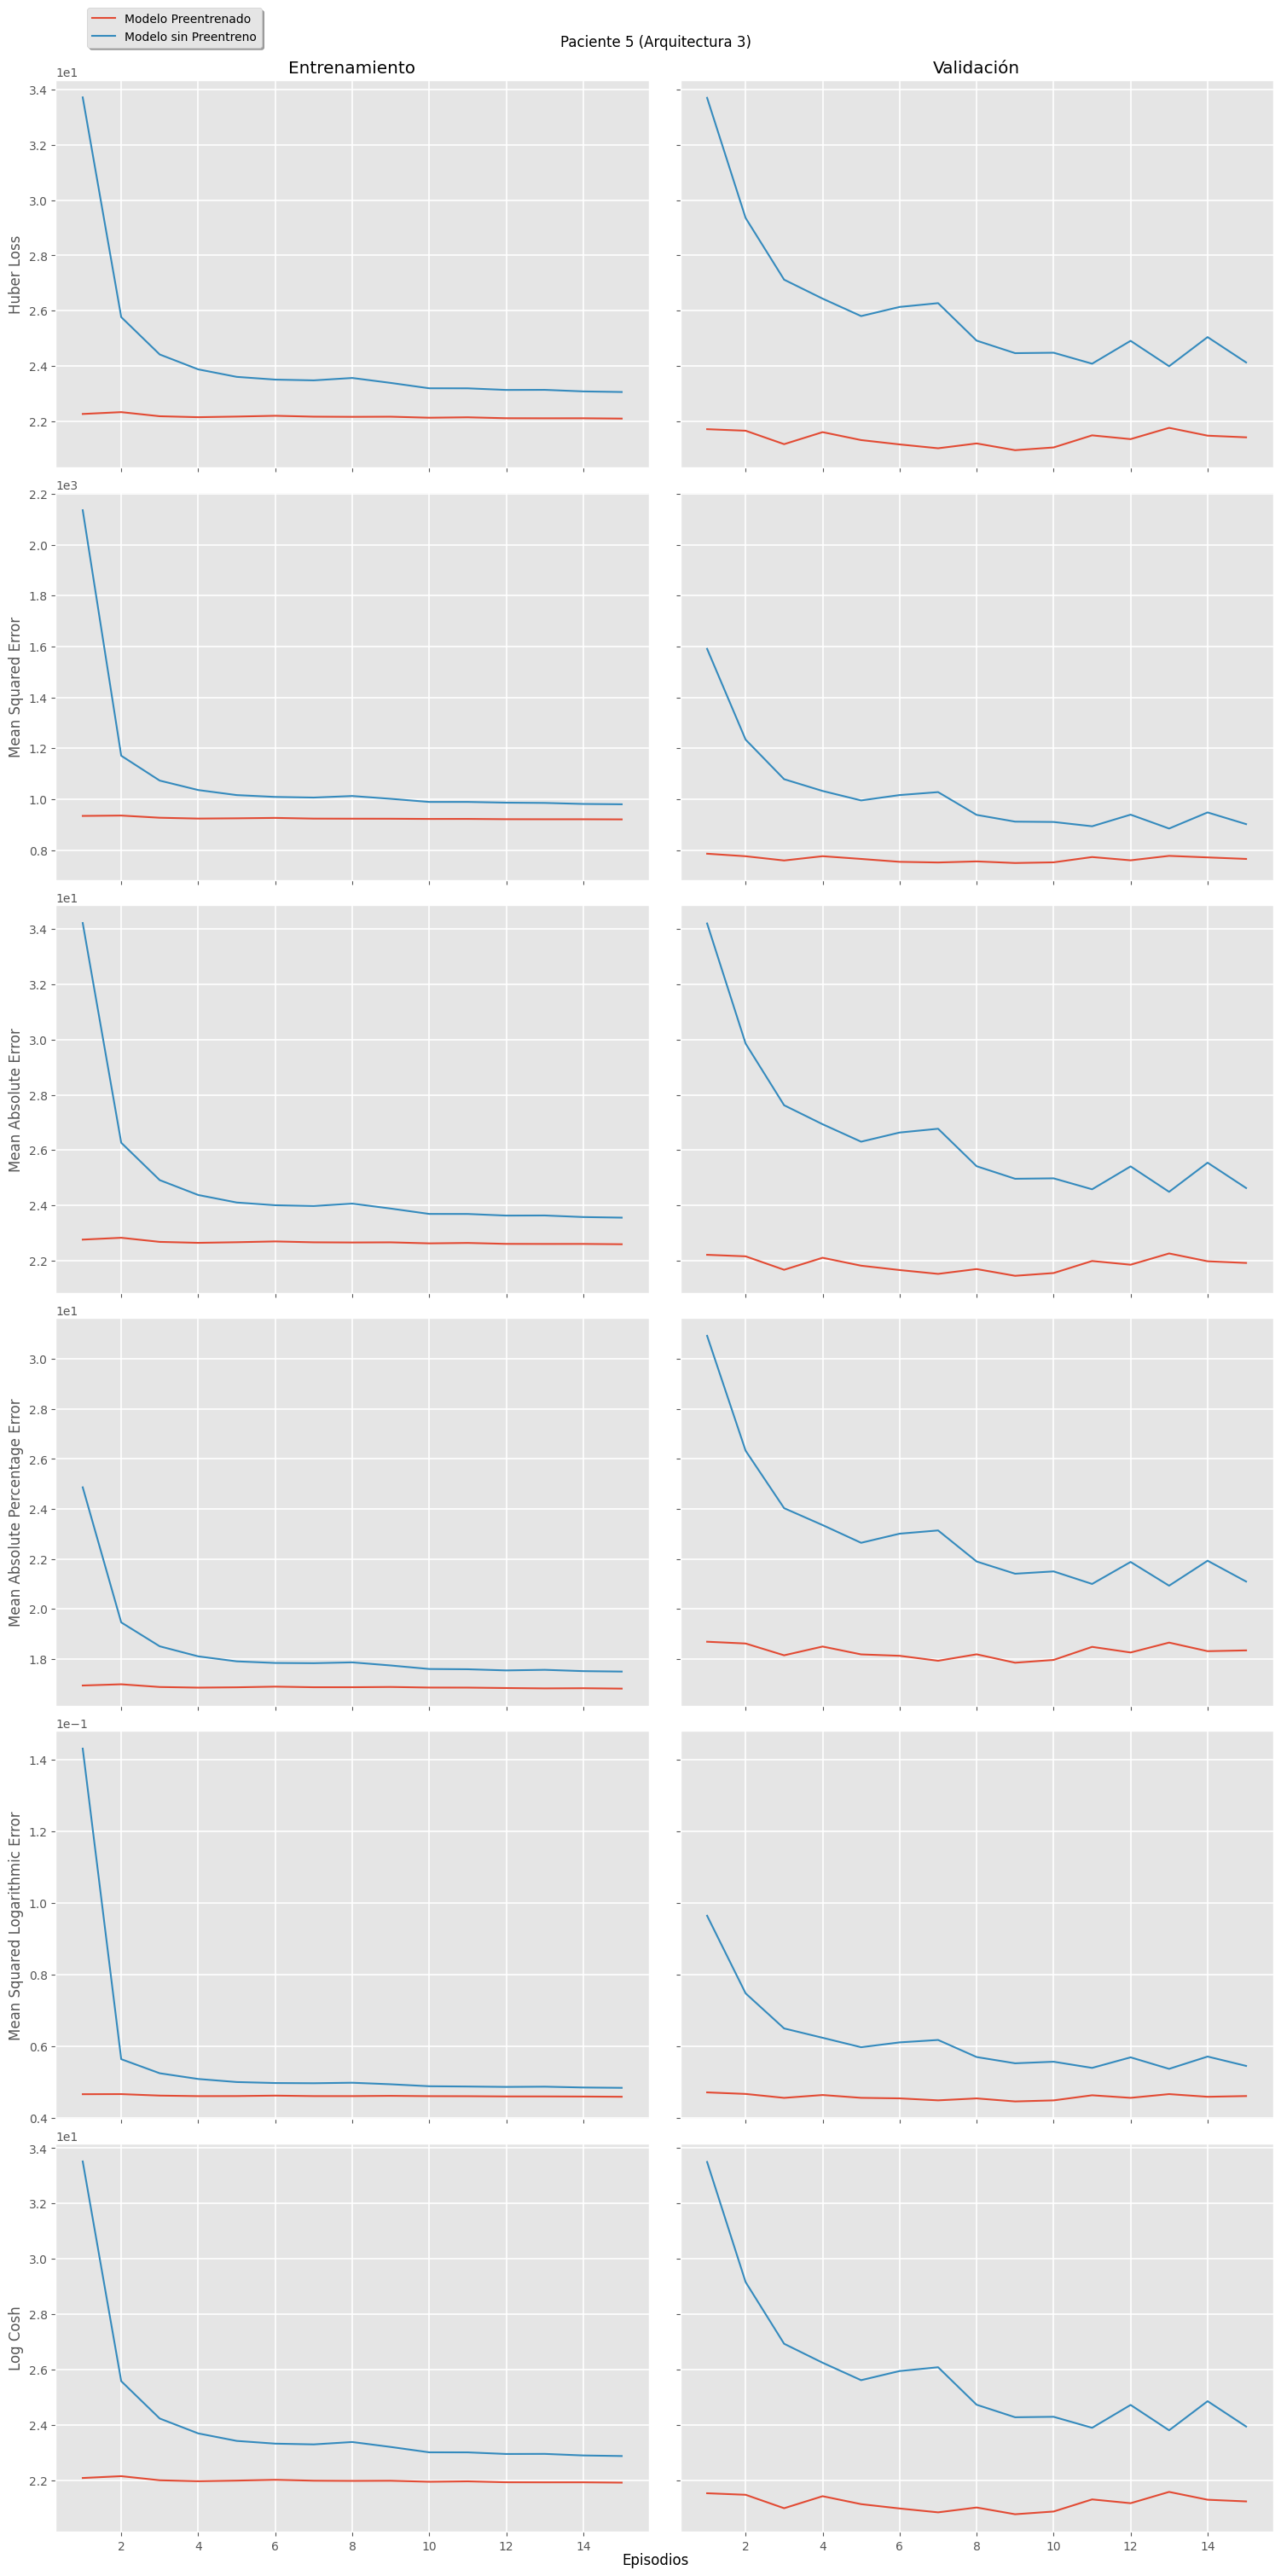

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

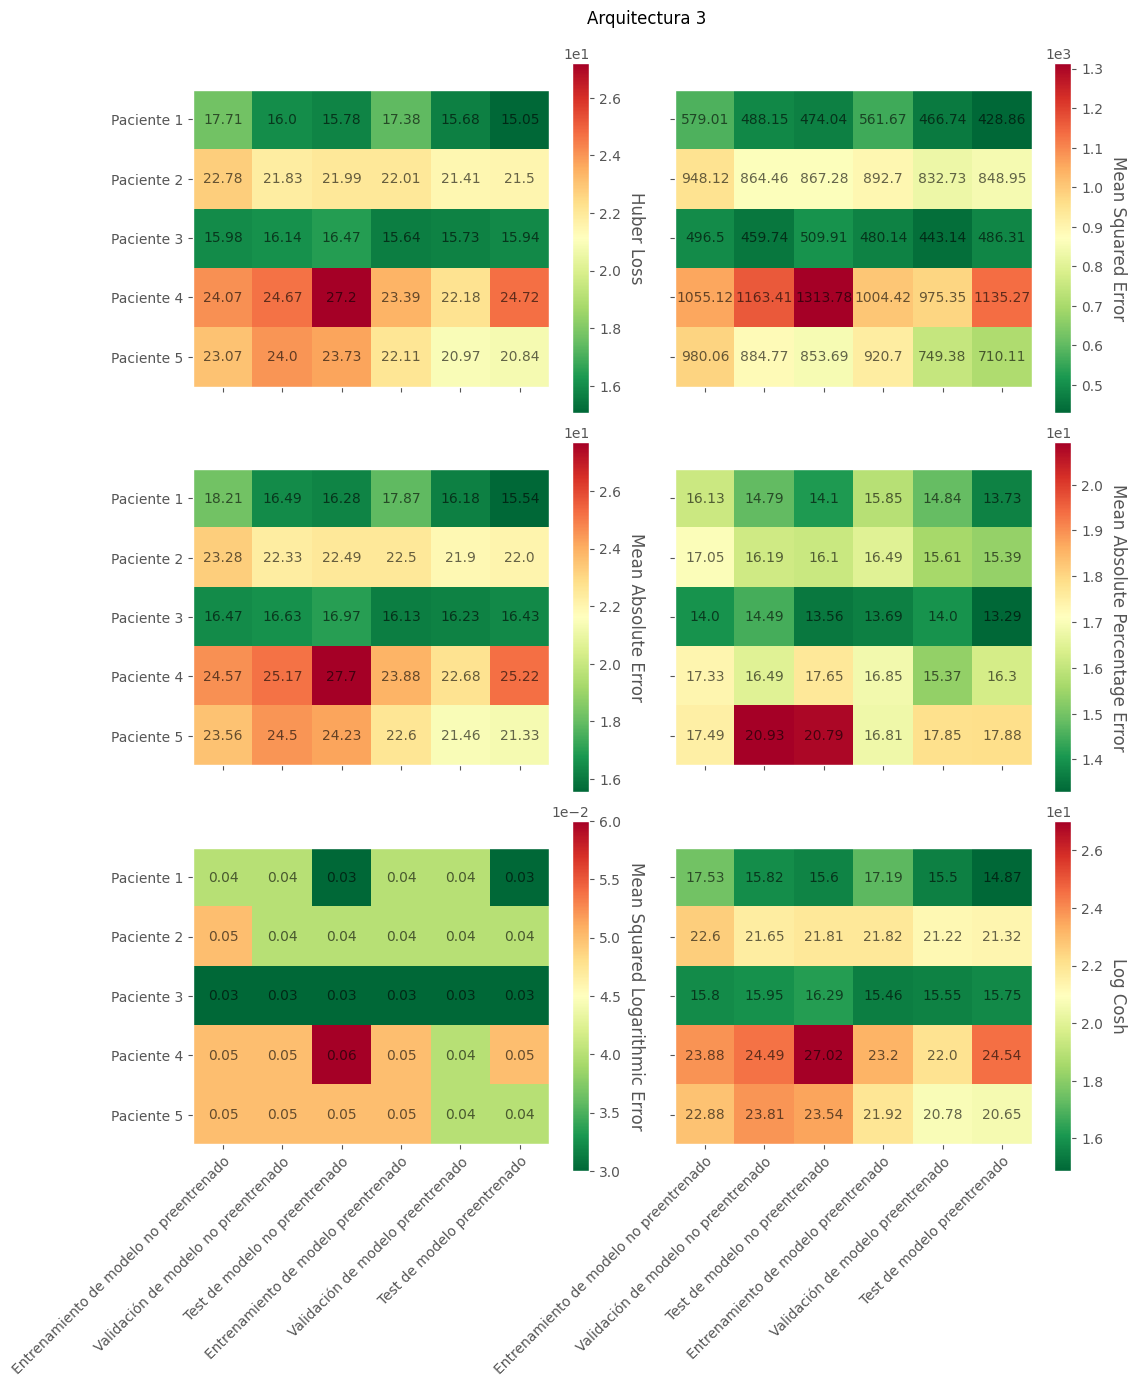

In [ ]:
from os import spawnve
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({'figure.autolayout': False})
checkpoint_folder='/content/drive/MyDrive/Checkpoint/ARCHITECTURE_1/'

def err_heatmap(array,max,min,title,ax,sci=True):
    #fig, ax = plt.subplots()
    im = ax.imshow(array,cmap="RdYlGn_r",vmin=min,vmax=max)
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.25)
    #cbar = ax.figure.colorbar(im, cax=cax)
    #cbar.ax.set_ylabel('', rotation=-90, va="bottom")
    sux=['Entrenamiento de modelo no preentrenado','Validación de modelo no preentrenado','Test de modelo no preentrenado','Entrenamiento de modelo preentrenado','Validación de modelo preentrenado','Test de modelo preentrenado']
    suy=['Paciente 1','Paciente 2','Paciente 3','Paciente 4','Paciente 5']

    ax.set_xticks(np.arange(len(sux)))
    ax.set_yticks(np.arange(len(suy)))
    ax.set_xticklabels(sux)
    ax.set_yticklabels(suy)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    for i in range(len(suy)):
        for j in range(len(sux)):
            text = ax.text(j, i, array[i, j],
                        ha="center", va="center", color="black", alpha=0.6)

    #ax.set_title('Tabla de Calor - '+title)
    # Create colorbar
    cbar_kw=None
    if cbar_kw is None:
        cbar_kw = {}
    cbarlabel=title
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    if sci:
      cbar.ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.grid(False)

for ARCHITECTURE_NUMBER in range(1,4):
  checkpoint_folder='/content/drive/MyDrive/Checkpoint/ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)+'/'
  print('ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)+'\n')

  pretrained_metrics_1=[]
  fromthescratch_metrics_1=[]
  test_pretrained_metrics_1=[]
  test_fromthescratch_metrics_1=[]

  for ind in range(0,5):
    pretrained_metrics_1.append(np.load(checkpoint_folder+'pretrained_metrics_'+str(ind)+'(ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)+').npy',allow_pickle='TRUE').item())
    fromthescratch_metrics_1.append(np.load(checkpoint_folder+'fromthescratch_metrics_'+str(ind)+'(ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)+').npy',allow_pickle='TRUE').item())
    test_pretrained_metrics_1.append(np.load(checkpoint_folder+'test_pretrained_metrics_'+str(ind)+'(ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)+').npy',allow_pickle='TRUE')[1:])
    test_fromthescratch_metrics_1.append(np.load(checkpoint_folder+'test_fromthescratch_metrics_'+str(ind)+'(ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)+').npy',allow_pickle='TRUE')[1:])

  metric_list=list(pretrained_metrics_1[0].keys())[:7]
  print(metric_list)
  #metric_list.remove('cosine_similarity')
  metric_list.remove('loss')

  for ind in range(0,5):
    print('PATIENT_'+str(ind)+'\n')
    #plt.style.use("ggplot")
    plt.style.use("ggplot")
    fig, axs = plt.subplots(6, 2, sharex=True, sharey='row', figsize=(15, 30))
    fig.suptitle('Paciente '+str(ind+1)+' (Arquitectura '+str(ARCHITECTURE_NUMBER)+')',y=1)
    fig.supxlabel('Episodios')
    fig.tight_layout()

    for metric_index,metric in enumerate(metric_list[:]):

      axs[metric_index,0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
      axs[metric_index,0].plot(np.arange(1,16),pretrained_metrics_1[ind][metric],label='Modelo Preentrenado')
      axs[metric_index,0].plot(np.arange(1,16),fromthescratch_metrics_1[ind][metric],label='Modelo sin Preentreno')
      if metric_index==0:
        axs[metric_index,0].set_title('Entrenamiento')
      axs[metric_index,0].grid(which='major', color='white', linewidth=1.2)
      axs[metric_index,0].set_ylabel(metric.replace("_", " " ).title())
      if metric_index==0:
        axs[metric_index,0].legend(loc='upper center', bbox_to_anchor=(0.2, 1.20), fancybox=True, shadow=True)

      axs[metric_index,1].plot(np.arange(1,16),pretrained_metrics_1[ind]['val_'+metric],label='Modelo Preentrenado')
      axs[metric_index,1].plot(np.arange(1,16),fromthescratch_metrics_1[ind]['val_'+metric],label='Modelo sin Preentreno')
      if metric_index==0:
        axs[metric_index,1].set_title('Validación')
      axs[metric_index,1].grid(which='major', color='white', linewidth=1.2)

    if SAVE:
      plt.savefig('p'+str(ind+1)+'_arch'+str(ARCHITECTURE_NUMBER)+'_metrics.png',bbox_inches="tight")
      if DOWNLOAD:
        files.download('p'+str(ind+1)+'_arch'+str(ARCHITECTURE_NUMBER)+'_metrics.png')
    #plt.legend(loc='upper center', fancybox=True, shadow=True)
    plt.show()

  fig, axs = plt.subplots(3, 2, sharex=True, sharey='row', figsize=(10, 12))
  fig.suptitle('Arquitectura '+str(ARCHITECTURE_NUMBER),y=1)
  fig.tight_layout()

  for metric_index,metric in enumerate(metric_list):
    title=metric.replace("_", " " ).title()
    array=np.zeros((5,6))
    for patient_index in range(0,5):
      for model_index in range(0,2):
        if model_index==0:
          array[patient_index,3*model_index]=round(np.amin(fromthescratch_metrics_1[patient_index][metric]),2)
          array[patient_index,3*model_index+1]=round(np.amin(fromthescratch_metrics_1[patient_index]['val_'+metric]),2)
          array[patient_index,3*model_index+2]=round(test_fromthescratch_metrics_1[patient_index][metric_index],2)
        elif model_index==1:
          array[patient_index,3*model_index]=round(np.amin(pretrained_metrics_1[patient_index][metric]),2)
          array[patient_index,3*model_index+1]=round(np.amin(pretrained_metrics_1[patient_index]['val_'+metric]),2)
          array[patient_index,3*model_index+2]=round(test_pretrained_metrics_1[patient_index][metric_index],2)
    index=int(np.floor(metric_index/2))
    if metric_index%2==0:
      err_heatmap(array,np.max(array),np.min(array),title,axs[index,0])
    else:
      err_heatmap(array,np.max(array),np.min(array),title,axs[index,1])

  if SAVE:
    plt.savefig('min_arch'+str(ARCHITECTURE_NUMBER)+'.png',bbox_inches="tight")
    if DOWNLOAD:
      files.download('min_arch'+str(ARCHITECTURE_NUMBER)+'.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

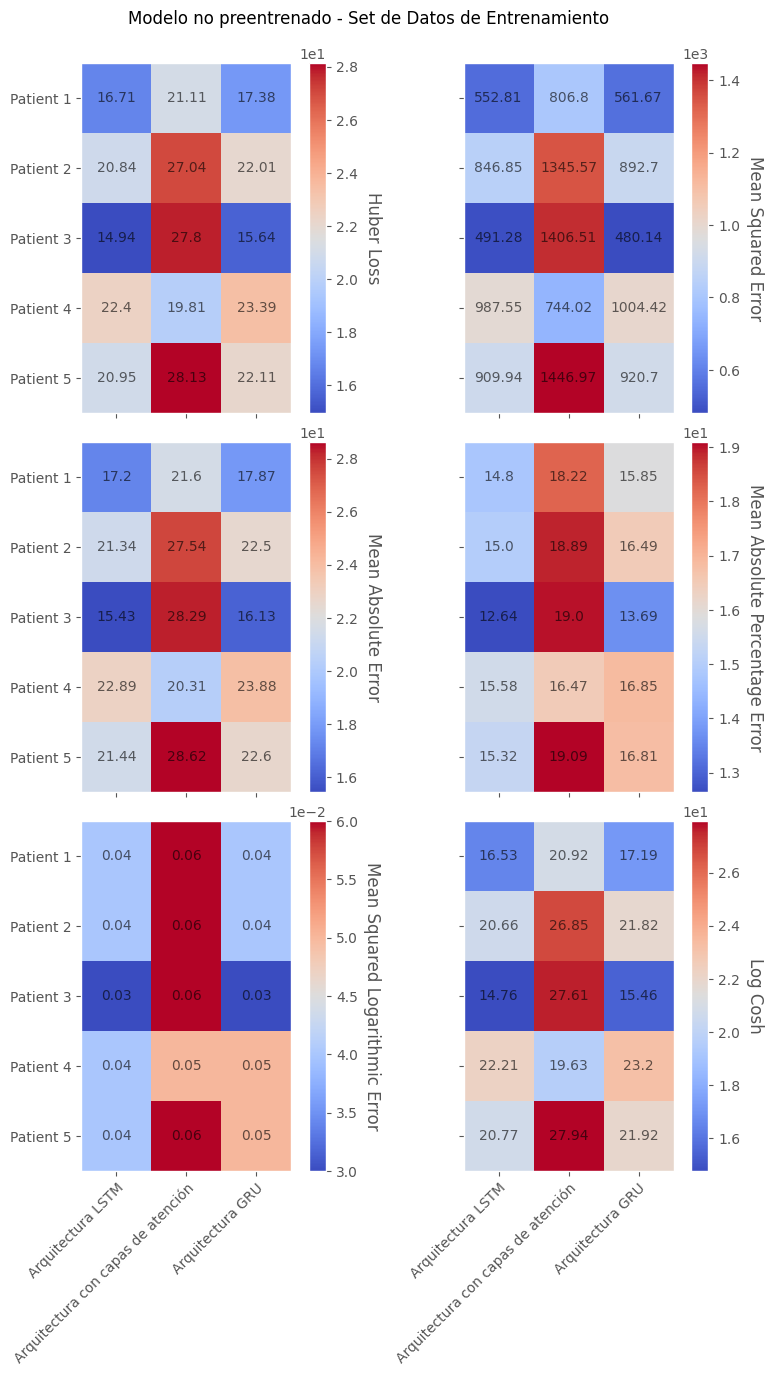

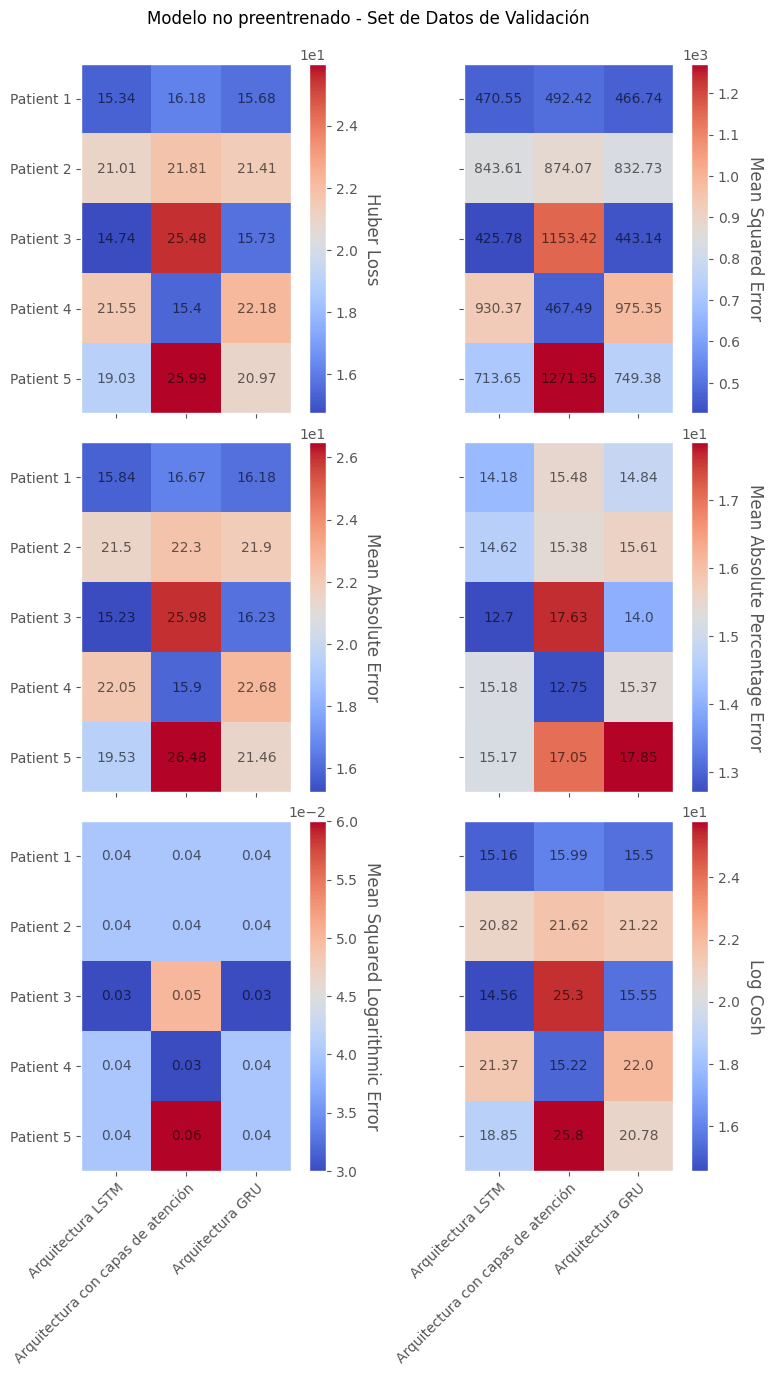

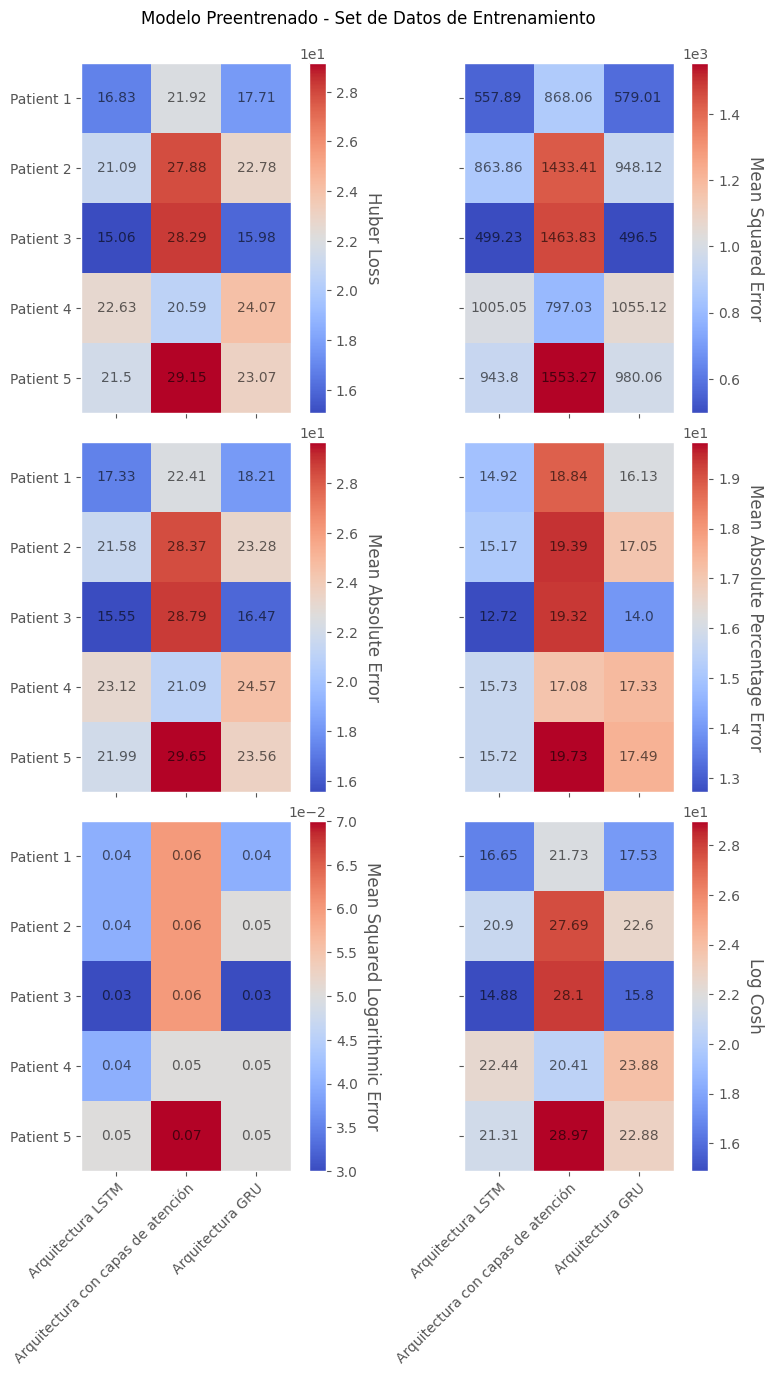

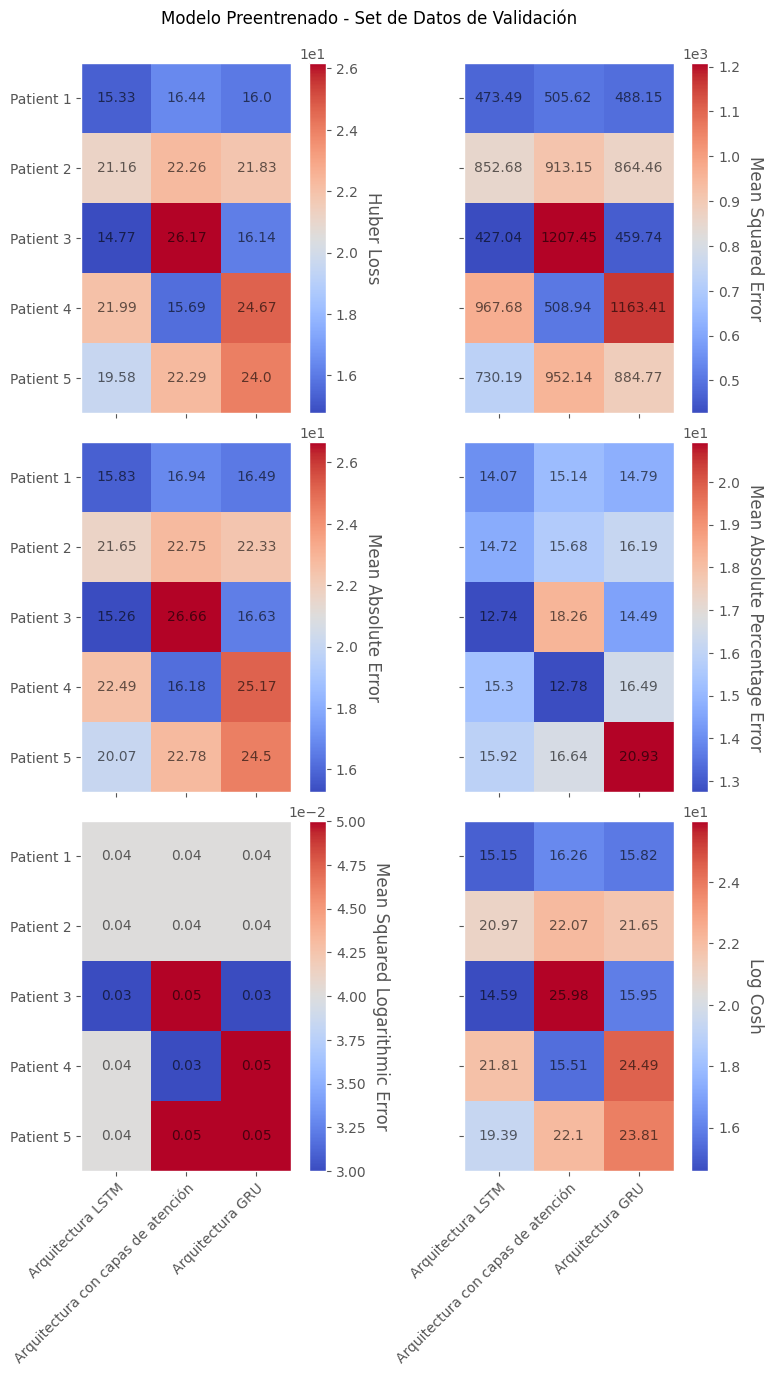

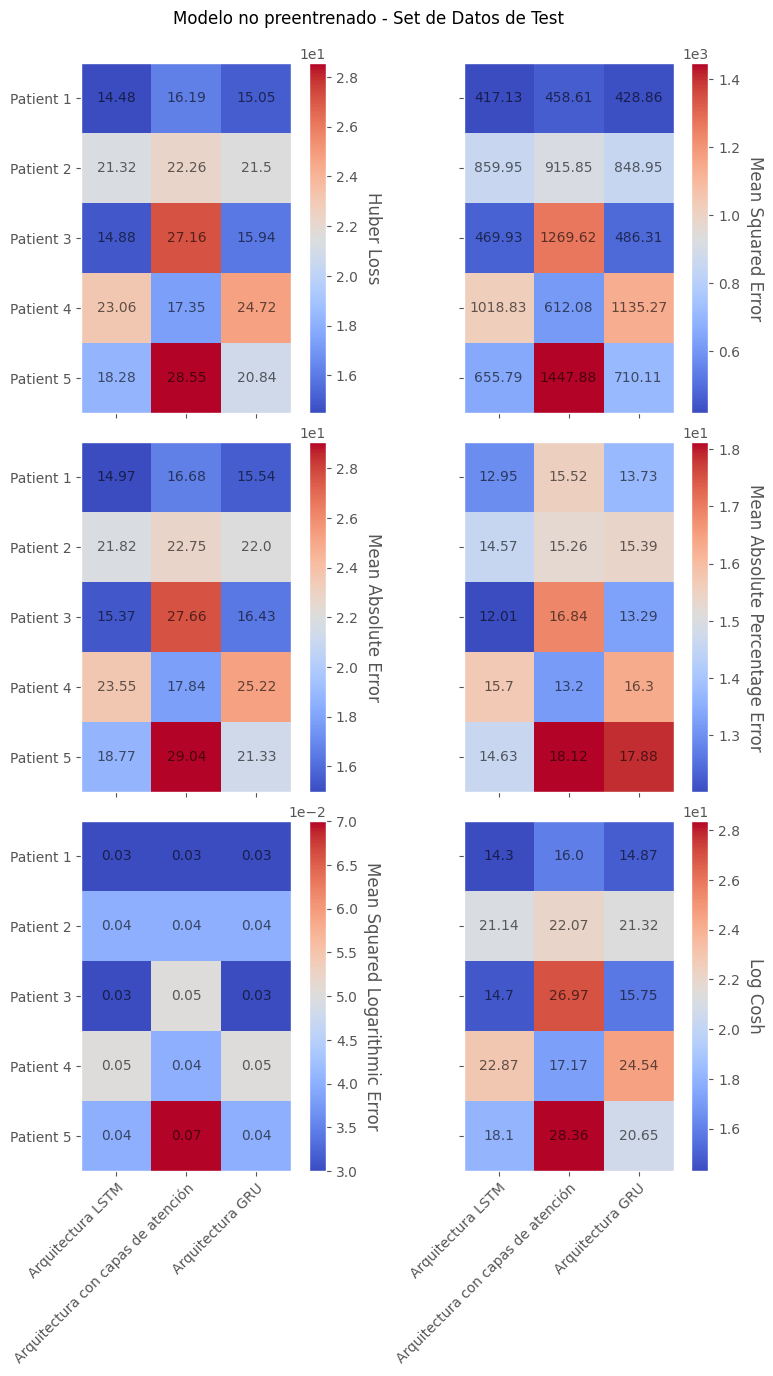

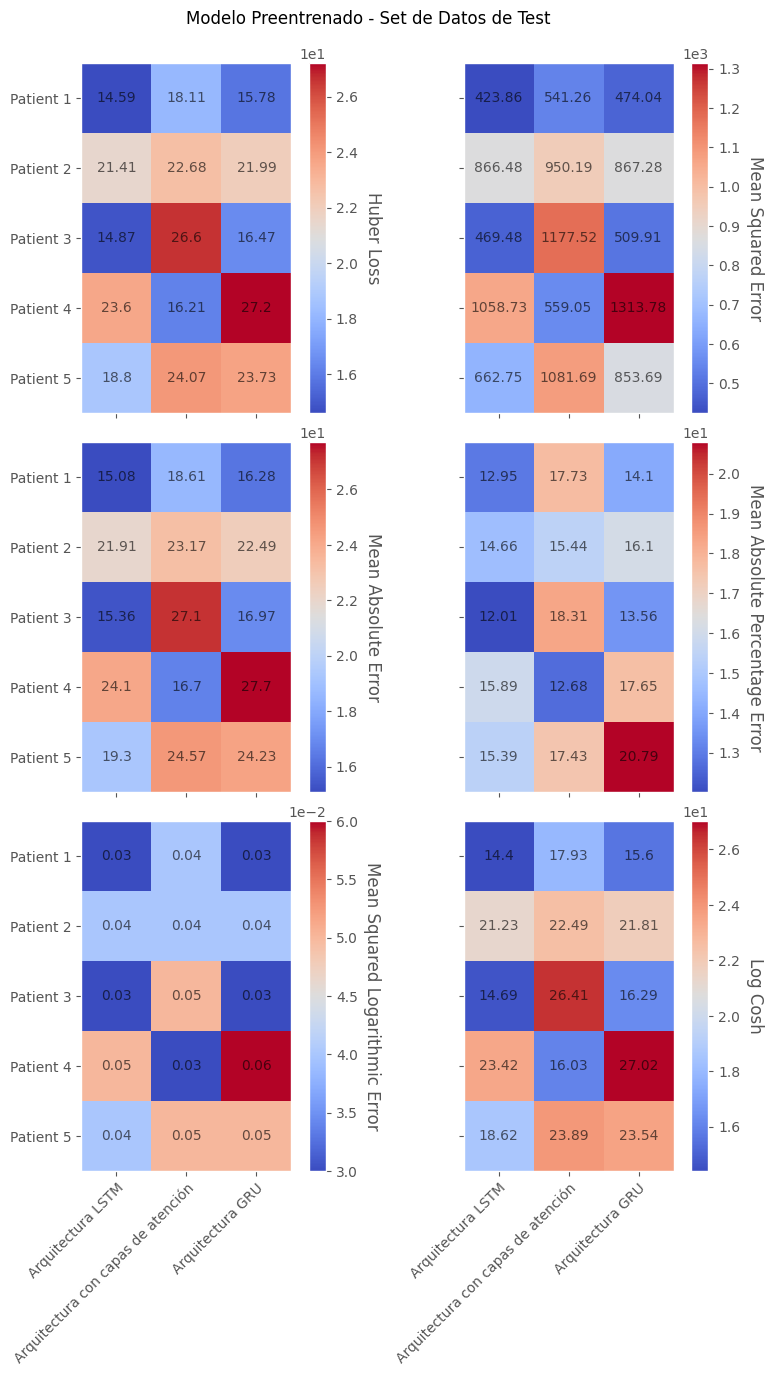

In [ ]:
pretrained_archs={}
fromthescratch_archs={}
test_pretrained_archs={}
test_fromthescratch_archs={}

def err_heatmap(array,max,min,title,ax,sci=True):
    #fig, ax = plt.subplots()
    im = ax.imshow(array,cmap="coolwarm",vmin=min,vmax=max)
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.25)
    #cbar = ax.figure.colorbar(im, cax=cax)
    #cbar.ax.set_ylabel('', rotation=-90, va="bottom")
    sux=['Arquitectura LSTM','Arquitectura con capas de atención','Arquitectura GRU']
    suy=['Patient 1','Patient 2','Patient 3','Patient 4','Patient 5']

    ax.set_xticks(np.arange(len(sux)))
    ax.set_yticks(np.arange(len(suy)))
    ax.set_xticklabels(sux)
    ax.set_yticklabels(suy)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    for i in range(len(suy)):
        for j in range(len(sux)):
            text = ax.text(j, i, array[i, j],
                        ha="center", va="center", color="black", alpha=0.6)

    #ax.set_title('Tabla de Calor - '+title)
    # Create colorbar
    cbar_kw=None
    if cbar_kw is None:
        cbar_kw = {}
    cbarlabel=title
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    if sci:
      cbar.ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.grid(False)

for ARCHITECTURE_NUMBER in range(1,4):
  checkpoint_folder='/content/drive/MyDrive/Checkpoint/ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)+'/'
  #print('ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)+'\n')

  pretrained_metrics_1=[]
  fromthescratch_metrics_1=[]
  test_pretrained_metrics_1=[]
  test_fromthescratch_metrics_1=[]

  for ind in range(0,5):
    pretrained_metrics_1.append(np.load(checkpoint_folder+'pretrained_metrics_'+str(ind)+'(ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)+').npy',allow_pickle='TRUE').item())
    fromthescratch_metrics_1.append(np.load(checkpoint_folder+'fromthescratch_metrics_'+str(ind)+'(ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)+').npy',allow_pickle='TRUE').item())
    test_pretrained_metrics_1.append(np.load(checkpoint_folder+'test_pretrained_metrics_'+str(ind)+'(ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)+').npy',allow_pickle='TRUE')[1:])
    test_fromthescratch_metrics_1.append(np.load(checkpoint_folder+'test_fromthescratch_metrics_'+str(ind)+'(ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)+').npy',allow_pickle='TRUE')[1:])

  pretrained_archs['ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)]=pretrained_metrics_1
  fromthescratch_archs['ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)]=fromthescratch_metrics_1
  test_pretrained_archs['ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)]=test_pretrained_metrics_1
  test_fromthescratch_archs['ARCHITECTURE_'+str(ARCHITECTURE_NUMBER)]=test_fromthescratch_metrics_1

arch_names=['ARCHITECTURE_1','ARCHITECTURE_2','ARCHITECTURE_3']
model_names=['Modelo no preentrenado','Modelo Preentrenado']
model_dicts=[pretrained_archs,fromthescratch_archs]
test_model_dicts=[test_pretrained_archs,test_fromthescratch_archs]

for model_name,model_dict in zip(model_names,model_dicts):
  fig, axs = plt.subplots(3, 2, sharex=True, sharey='row', figsize=(8, 12))
  fig.suptitle(model_name+' - Set de Datos de Entrenamiento',y=1)
  fig.tight_layout()

  for metric_index,metric in enumerate(metric_list):
    title=metric.replace("_", " " ).title()
    array=np.zeros((5,3))
    for patient_index in range(0,5):
      for arch_index,arch in enumerate(arch_names):
        array[patient_index,arch_index]=round(np.amin(model_dict[arch][patient_index][metric]),2)

    index=int(np.floor(metric_index/2))
    if metric_index%2==0:
      err_heatmap(array,np.max(array),np.min(array),title,axs[index,0])
    else:
      err_heatmap(array,np.max(array),np.min(array),title,axs[index,1])

  if SAVE:
    if model_name=='Modelo no preentrenado':
      plt.savefig('NonPretrained_training.png',bbox_inches="tight")
      if DOWNLOAD:
        files.download('NonPretrained_training.png')
    else:
      plt.savefig('Pretrained_training.png',bbox_inches="tight")
      if DOWNLOAD:
        files.download('Pretrained_training.png')

  fig, axs = plt.subplots(3, 2, sharex=True, sharey='row', figsize=(8, 12))
  fig.suptitle(model_name+' - Set de Datos de Validación',y=1)
  fig.tight_layout()

  for metric_index,metric in enumerate(metric_list):
    title=metric.replace("_", " " ).title()
    array=np.zeros((5,3))
    for patient_index in range(0,5):
      for arch_index,arch in enumerate(arch_names):
        array[patient_index,arch_index]=round(np.amin(model_dict[arch][patient_index]['val_'+metric]),2)

    index=int(np.floor(metric_index/2))
    if metric_index%2==0:
      err_heatmap(array,np.max(array),np.min(array),title,axs[index,0])
    else:
      err_heatmap(array,np.max(array),np.min(array),title,axs[index,1])

  if SAVE:
    if model_name=='Modelo no preentrenado':
      plt.savefig('NonPretrained_validation.png',bbox_inches="tight")
      if DOWNLOAD:
        files.download('NonPretrained_validation.png')
    else:
      plt.savefig('Pretrained_validation.png',bbox_inches="tight")
      if DOWNLOAD:
        files.download('Pretrained_validation.png')

for model_name,model_dict in zip(model_names,test_model_dicts):
  fig, axs = plt.subplots(3, 2, sharex=True, sharey='row', figsize=(8, 12))
  fig.suptitle(model_name+' - Set de Datos de Test',y=1)
  fig.tight_layout()

  for metric_index,metric in enumerate(metric_list):
    title=metric.replace("_", " " ).title()
    array=np.zeros((5,3))
    for patient_index in range(0,5):
      for arch_index,arch in enumerate(arch_names):
        array[patient_index,arch_index]=round(model_dict[arch][patient_index][metric_index],2)

    index=int(np.floor(metric_index/2))
    if metric_index%2==0:
      err_heatmap(array,np.max(array),np.min(array),title,axs[index,0])
    else:
      err_heatmap(array,np.max(array),np.min(array),title,axs[index,1])

  if SAVE:
    if model_name=='Modelo no preentrenado':
      plt.savefig('NonPretrained_test.png',bbox_inches="tight")
      if DOWNLOAD:
        files.download('NonPretrained_test.png')
    else:
      plt.savefig('Pretrained_test.png',bbox_inches="tight")
      if DOWNLOAD:
        files.download('Pretrained_test.png')